# Customer Personality Analysis 

- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import kmeans_plusplus,KMeans,DBSCAN,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df=pd.read_excel("marketing_campaign1.xlsx")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

<!-- #### Attributes
#### People
-•	ID: Customer's unique identifier
-•	Year_Birth: Customer's birth year
-•	Education: Customer's education level
-•	Marital_Status: Customer's marital status
-•	Income: Customer's yearly household income
-•	Kidhome: Number of children in customer's household
-•	Teenhome: Number of teenagers in customer's household
-•	Dt_Customer: Date of customer's enrollment with the company
-•	Recency: Number of days since customer's last purchase
-•	Complain: 1 if the customer complained in the last 2 years, 0 otherwise
-Products
-•	MntWines: Amount spent on wine in last 2 years
-•	MntFruits: Amount spent on fruits in last 2 years
-•	MntMeatProducts: Amount spent on meat in last 2 years
-•	MntFishProducts: Amount spent on fish in last 2 years
-•	MntSweetProducts: Amount spent on sweets in last 2 years
-•	MntGoldProds: Amount spent on gold in last 2 years
Promotion
-•	NumDealsPurchases: Number of purchases made with a discount
-•	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
-•	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
-•	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
-•	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
-•	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
-•	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place
-•	NumWebPurchases: Number of purchases made through the company’s website
-•	NumCatalogPurchases: Number of purchases made using a catalogue
-•	NumStorePurchases: Number of purchases made directly in stores
 -->

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Check for the null values

In [5]:
null=((df.isnull().sum())/len(df))*100
null

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

### There are no null values except the income feature which has the 1% of null values

# Check for duplicate records

In [6]:
df.duplicated().sum()

0

# Distribution and outlier detection

In [7]:
df.shape[1]

29

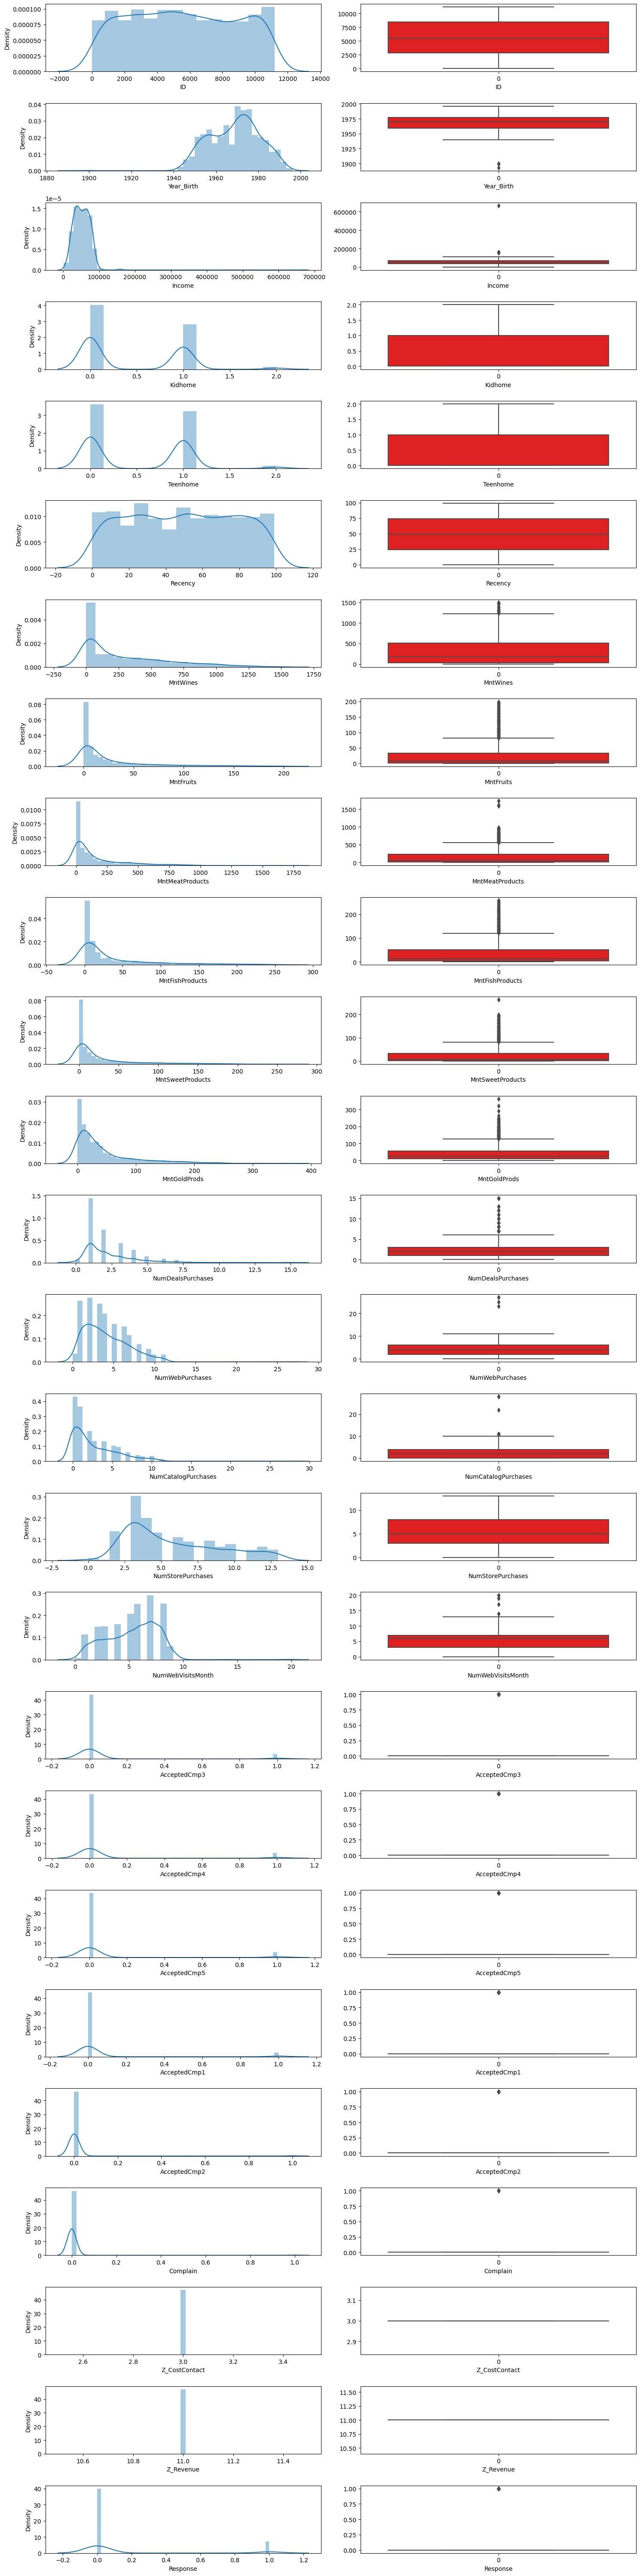

In [8]:
fig,ax=plt.subplots(nrows=df.shape[1]-3, ncols=2, figsize=(15,60))

for i, col in enumerate(df.select_dtypes('number').columns):
    sns.distplot(df[col],ax=ax[i][0])
    sns.boxplot(df[col],ax=ax[i][1],color='red')
    ax[i][0].set_xlabel(col)
    ax[i][1].set_xlabel(col)

plt.tight_layout()


# Skew and Kurtosis

In [9]:
sk=pd.DataFrame()
sk['Skewness']=df.skew()
sk['Kurtosis']=df.kurtosis()
sk

Skewness    Kurtosis
ID                    0.039832   -1.190028
Year_Birth           -0.349944    0.717464
Income                6.763487  159.636700
Kidhome               0.635288   -0.779661
Teenhome              0.407115   -0.986235
Recency              -0.001987   -1.201897
MntWines              1.175771    0.598744
MntFruits             2.102063    4.050976
MntMeatProducts       2.083233    5.516724
MntFishProducts       1.919769    3.096461
MntSweetProducts      2.136081    4.376548
MntGoldProds          1.886106    3.551709
NumDealsPurchases     2.418569    8.936914
NumWebPurchases       1.382794    5.703128
NumCatalogPurchases   1.880989    8.047437
NumStorePurchases     0.702237   -0.622048
NumWebVisitsMonth     0.207926    1.821614
AcceptedCmp3          3.291705    8.843214
AcceptedCmp4          3.241574    8.515406
AcceptedCmp5          3.291705    8.843214
AcceptedCmp1          3.555444   10.650694
AcceptedCmp2          8.472093   69.838711
Complain             10.188972  101.906135
Z_CostContact         0.000000    0.000000
Z_Revenue             0.000000    0.000000
Response              1.971555    1.888714

### Skewness:

- Skewness measures the asymmetry of the distribution of a variable. A skewness value close to zero indicates a relatively symmetric distribution.
- Most of the variables have skewness values around zero, suggesting that their distributions are approximately symmetric.
Variables like Income, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, and Response have skewness values greater than zero, indicating a right-skewed (positively skewed) distribution. This suggests that the majority of the data points for these variables are concentrated towards the lower end of the range, with a long tail towards higher values.
- Variables like AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain have skewness values significantly greater than zero, indicating a highly right-skewed distribution. This suggests that these variables have a few data points with very high values and the majority of data points with lower values.

### Kurtosis:

- Kurtosis measures the heaviness of the tails and the peakedness of the distribution of a variable. A kurtosis value greater than zero indicates heavier tails and a more peaked distribution compared to a normal distribution (which has a kurtosis value of 0).
- Most of the variables have kurtosis values around zero, suggesting that their distributions are relatively close to a normal distribution.
- Variables like MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain have kurtosis values greater than zero, indicating heavier tails and a more peaked distribution compared to a normal distribution. This suggests that these variables have more extreme values and a higher concentration of data points around the mean compared to a normal distribution.

# outlier pct

In [10]:
threshold=3
for i in df.select_dtypes('number').columns:
    lower_bound=df[i].mean()-df[i].std()
    upper_bound=df[i].mean()+df[i].std()
    n_outliers=len(df[(df[i]<lower_bound) | (df[i]>upper_bound)])
    pct_outliers=n_outliers/len(df)*100
    print(f"{i}: {pct_outliers:.2f}% outliers")

ID: 42.19% outliers
Year_Birth: 36.07% outliers
Income: 26.07% outliers
Kidhome: 42.28% outliers
Teenhome: 2.32% outliers
Recency: 42.01% outliers
MntWines: 16.88% outliers
MntFruits: 13.39% outliers
MntMeatProducts: 15.27% outliers
MntFishProducts: 14.55% outliers
MntSweetProducts: 13.53% outliers
MntGoldProds: 14.15% outliers
NumDealsPurchases: 12.81% outliers
NumWebPurchases: 36.88% outliers
NumCatalogPurchases: 16.74% outliers
NumStorePurchases: 28.53% outliers
NumWebVisitsMonth: 35.85% outliers
AcceptedCmp3: 7.28% outliers
AcceptedCmp4: 7.46% outliers
AcceptedCmp5: 7.28% outliers
AcceptedCmp1: 6.43% outliers
AcceptedCmp2: 1.34% outliers
Complain: 0.94% outliers
Z_CostContact: 0.00% outliers
Z_Revenue: 0.00% outliers
Response: 14.91% outliers


# Null imputation(income column)

### since there are very less null values in income feature so we are treating/imputing them with median value,since the income is skewed

In [11]:
import statistics as st
income_median=st.median(df['Income'])
df['Income'].fillna(income_median,inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

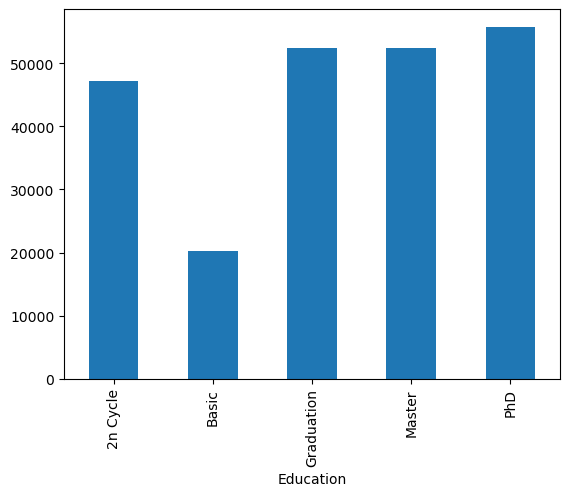

<Figure size 2000x500 with 0 Axes>

In [12]:
inc_edu=df.groupby(['Education'])['Income'].mean()
inc_edu_series=pd.Series(inc_edu)
inc_edu_series.plot(kind='bar')
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.show();

In [13]:
df['current_year']=2023
df['Age']=df['current_year']-df['Year_Birth']
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [14]:
bins=[0,18,30,45,60,121]
labels=['Teenage','Young adults','Middle Aged Adults','Old Adults','Very old adults']
df['Age Category']=pd.cut(df['Age'],bins=bins,labels=labels)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  current_year  Age        Age Category  
0              3         11         1          2023   66     Very old adults  
1              3         11         0          2023   69     Very old adults  
2              3         11         0          2023   58          Old Adults  
3              3         11         0          2023   39  Middle Aged Adults  
4              3         11         0          2023   42  Middle Aged Adults

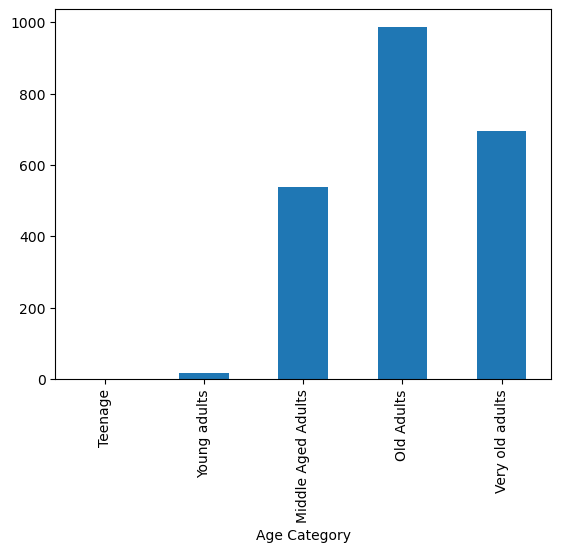

<Figure size 2000x500 with 0 Axes>

In [15]:
age_cat=df.groupby(['Age Category'])['Age Category'].count()
age_cat_series=pd.Series(age_cat)
age_cat_series.plot(kind='bar')
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.show();

# Middle aged and old adults tends to do more shopping rather than other age group people

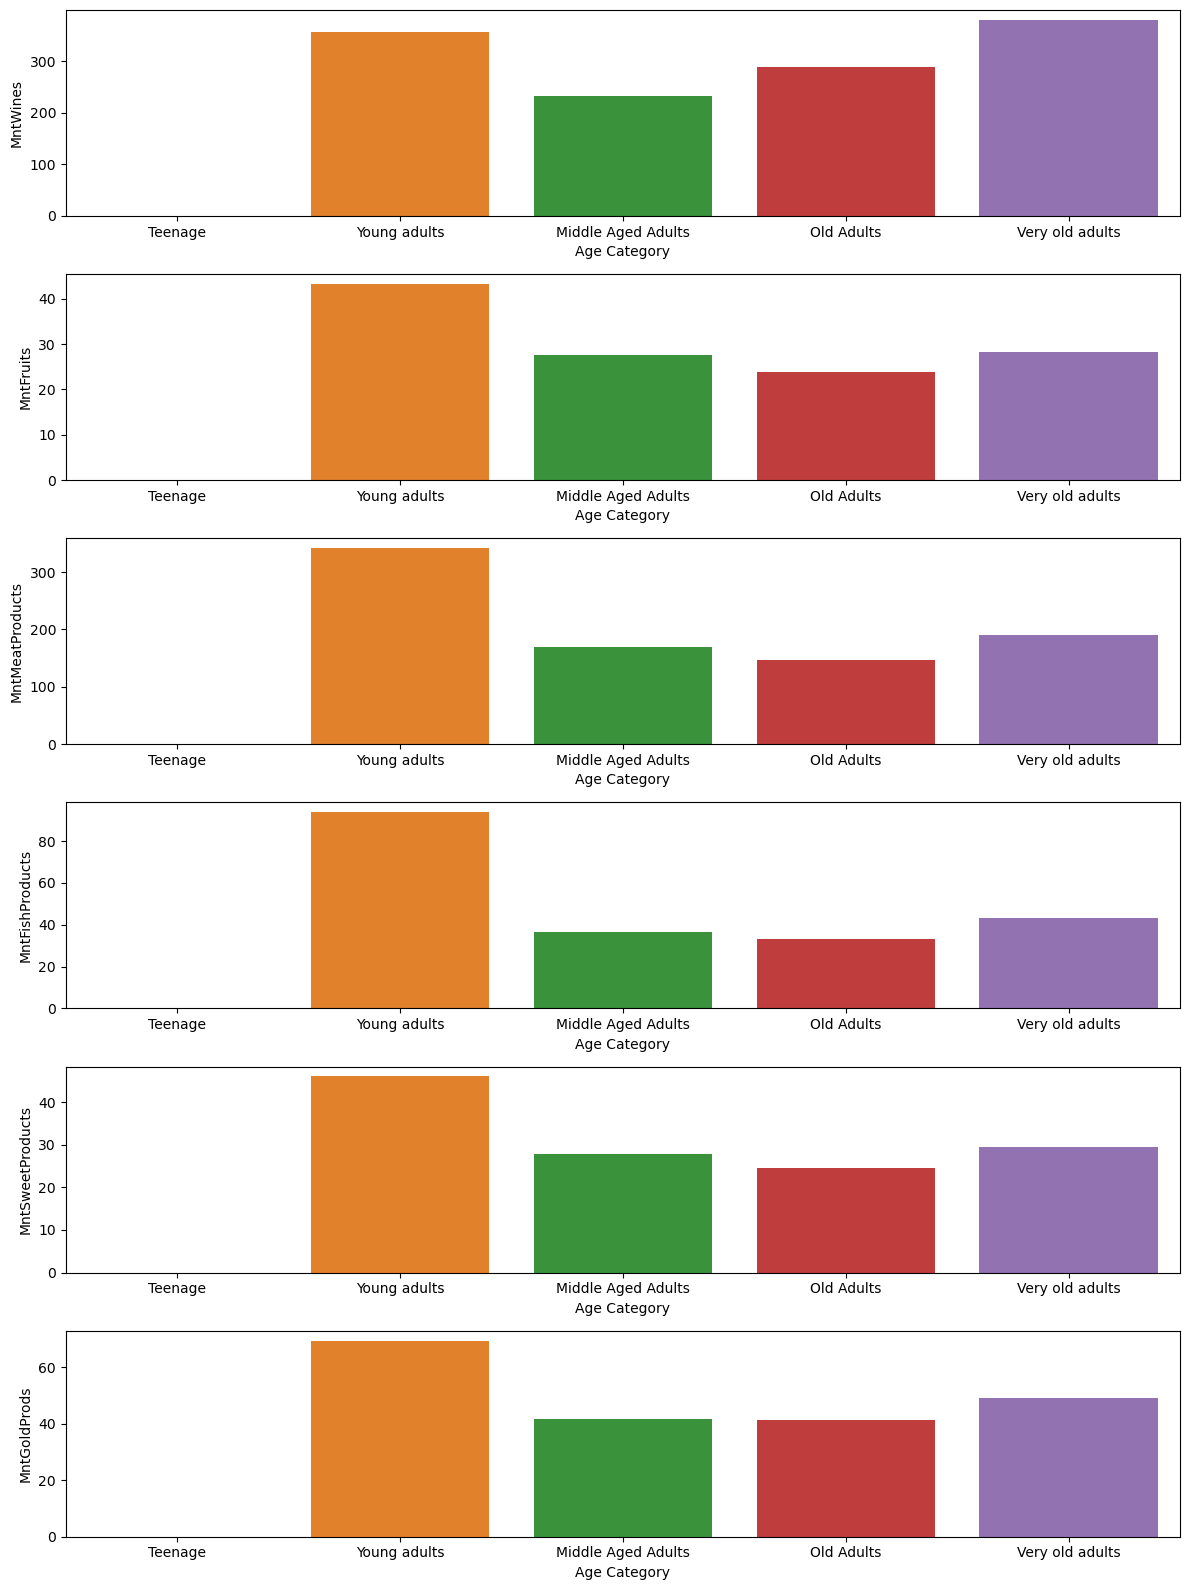

In [16]:
prod_purc = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axs = plt.subplots(nrows=len(prod_purc), ncols=1, figsize=(12,16))
for i, col in enumerate(prod_purc):
    age_prod_mean = df.groupby(['Age Category'])[col].mean()
    age_prod_mean_series = pd.Series(age_prod_mean)
    sns.barplot(x=age_prod_mean_series.index, y=age_prod_mean_series, ax=axs[i])
    axs[i].set_xlabel('Age Category')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()


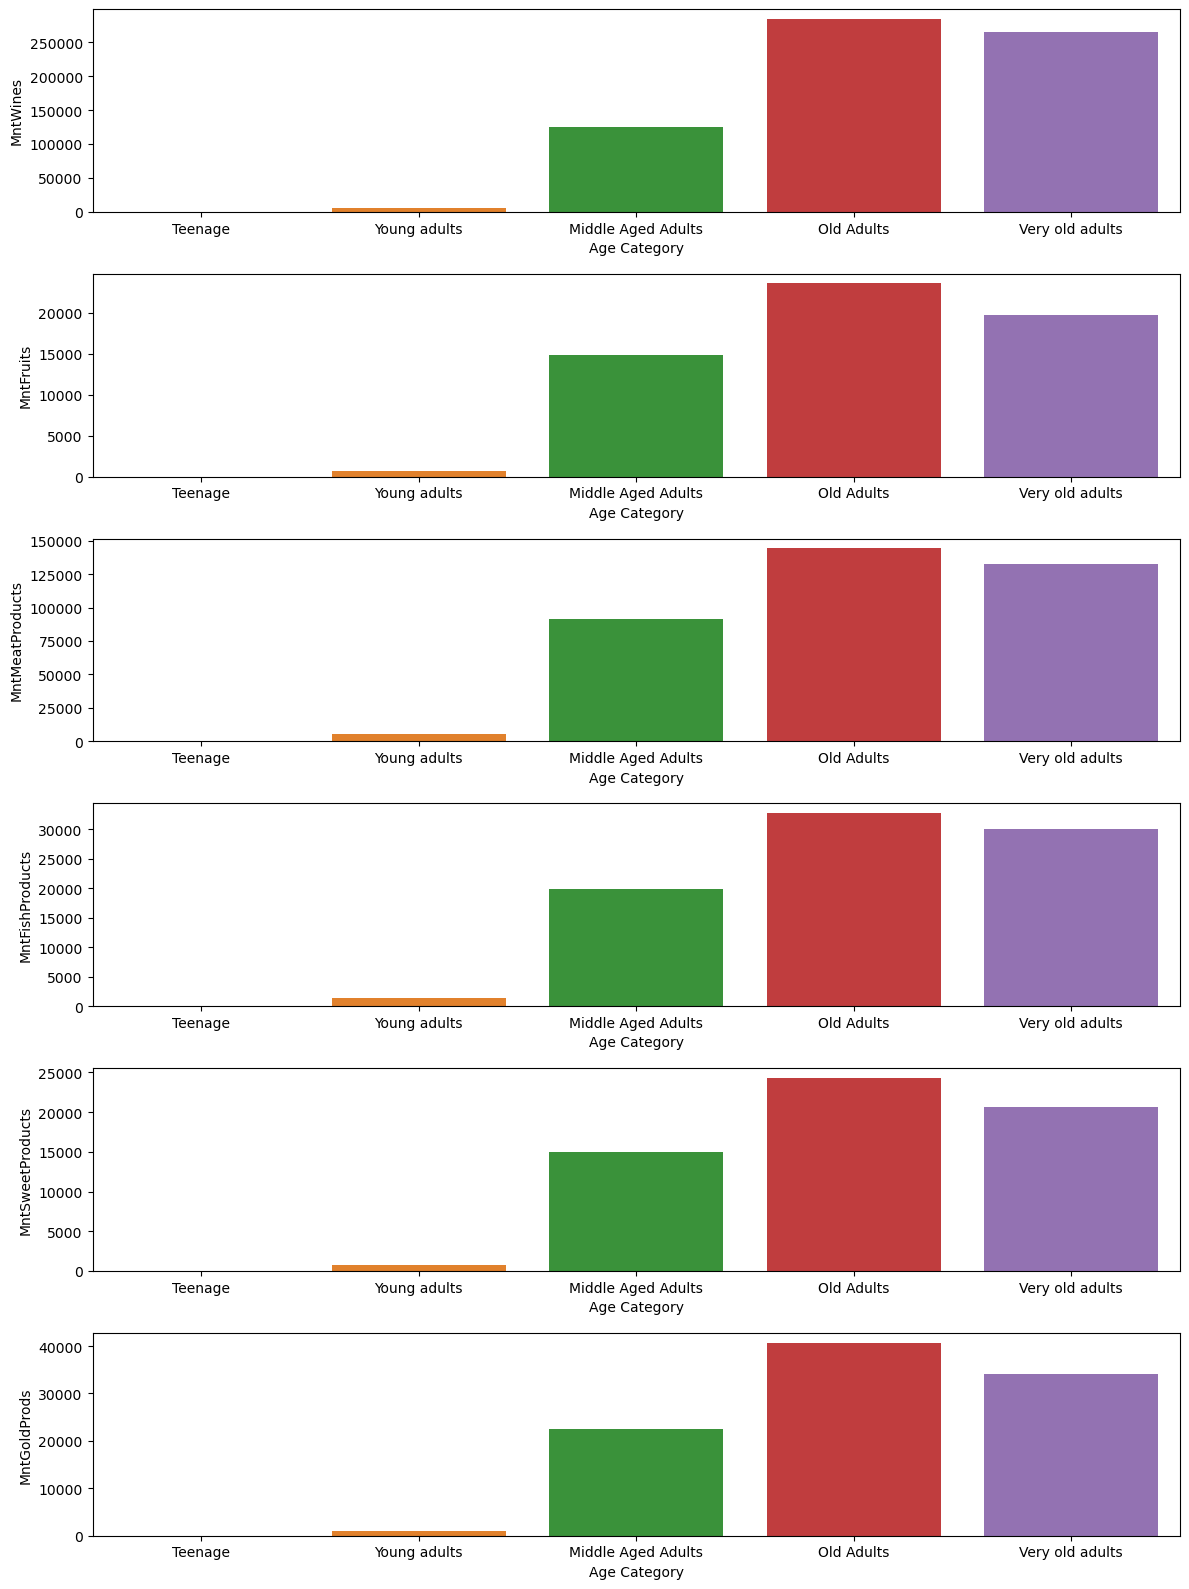

In [17]:
prod_purc = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axs = plt.subplots(nrows=len(prod_purc), ncols=1, figsize=(12,16))
for i, col in enumerate(prod_purc):
    age_prod_sum = df.groupby(['Age Category'])[col].sum()
    age_prod_sum_series = pd.Series(age_prod_sum)
    sns.barplot(x=age_prod_sum_series.index, y=age_prod_sum_series, ax=axs[i])
    axs[i].set_xlabel('Age Category')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()


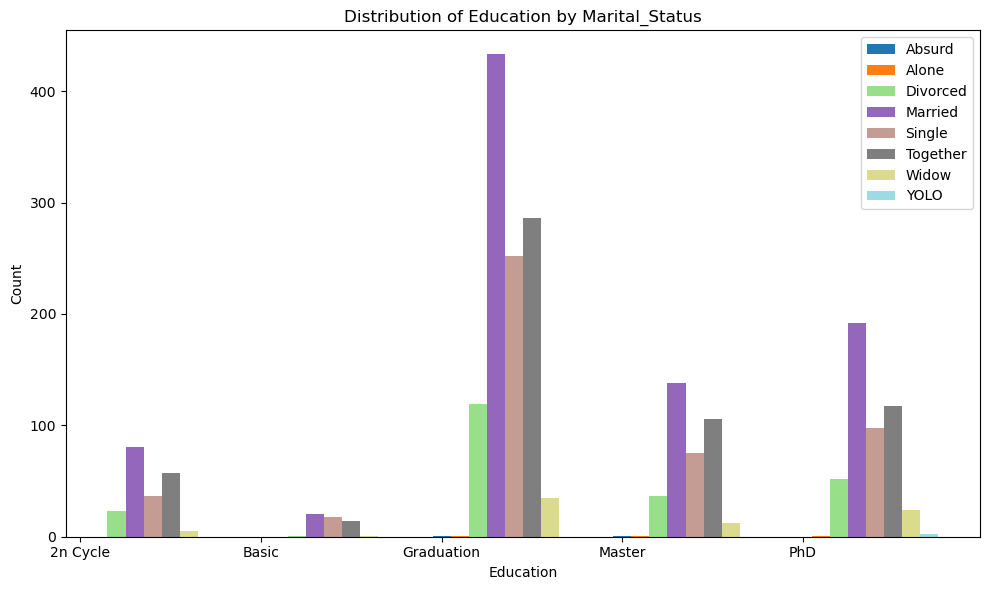

In [18]:
grouped_data = df.groupby(['Education', 'Marital_Status']).size().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

education_categories = grouped_data.index
x = range(len(education_categories))

num_marital_status = grouped_data.shape[1]

bar_width = 0.8 / num_marital_status

colors = plt.cm.get_cmap('tab20', num_marital_status)

for i, marital_status in enumerate(grouped_data.columns):
    counts = grouped_data[marital_status]
    ax.bar([p + i * bar_width for p in x], counts, width=bar_width, color=colors(i), label=marital_status)

ax.set_xticks(x)
ax.set_xticklabels(education_categories)
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Distribution of Education by Marital_Status')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


- most of the customers are Graduated, also people who are garduated and married are shopping more comparing to other cateogories,further customers who graduated & single and graduated & Together are tend to shop more compare to other categories
- Also most of the customers are graduated,who have done theie graduation,master,Phd who vary with different martial status

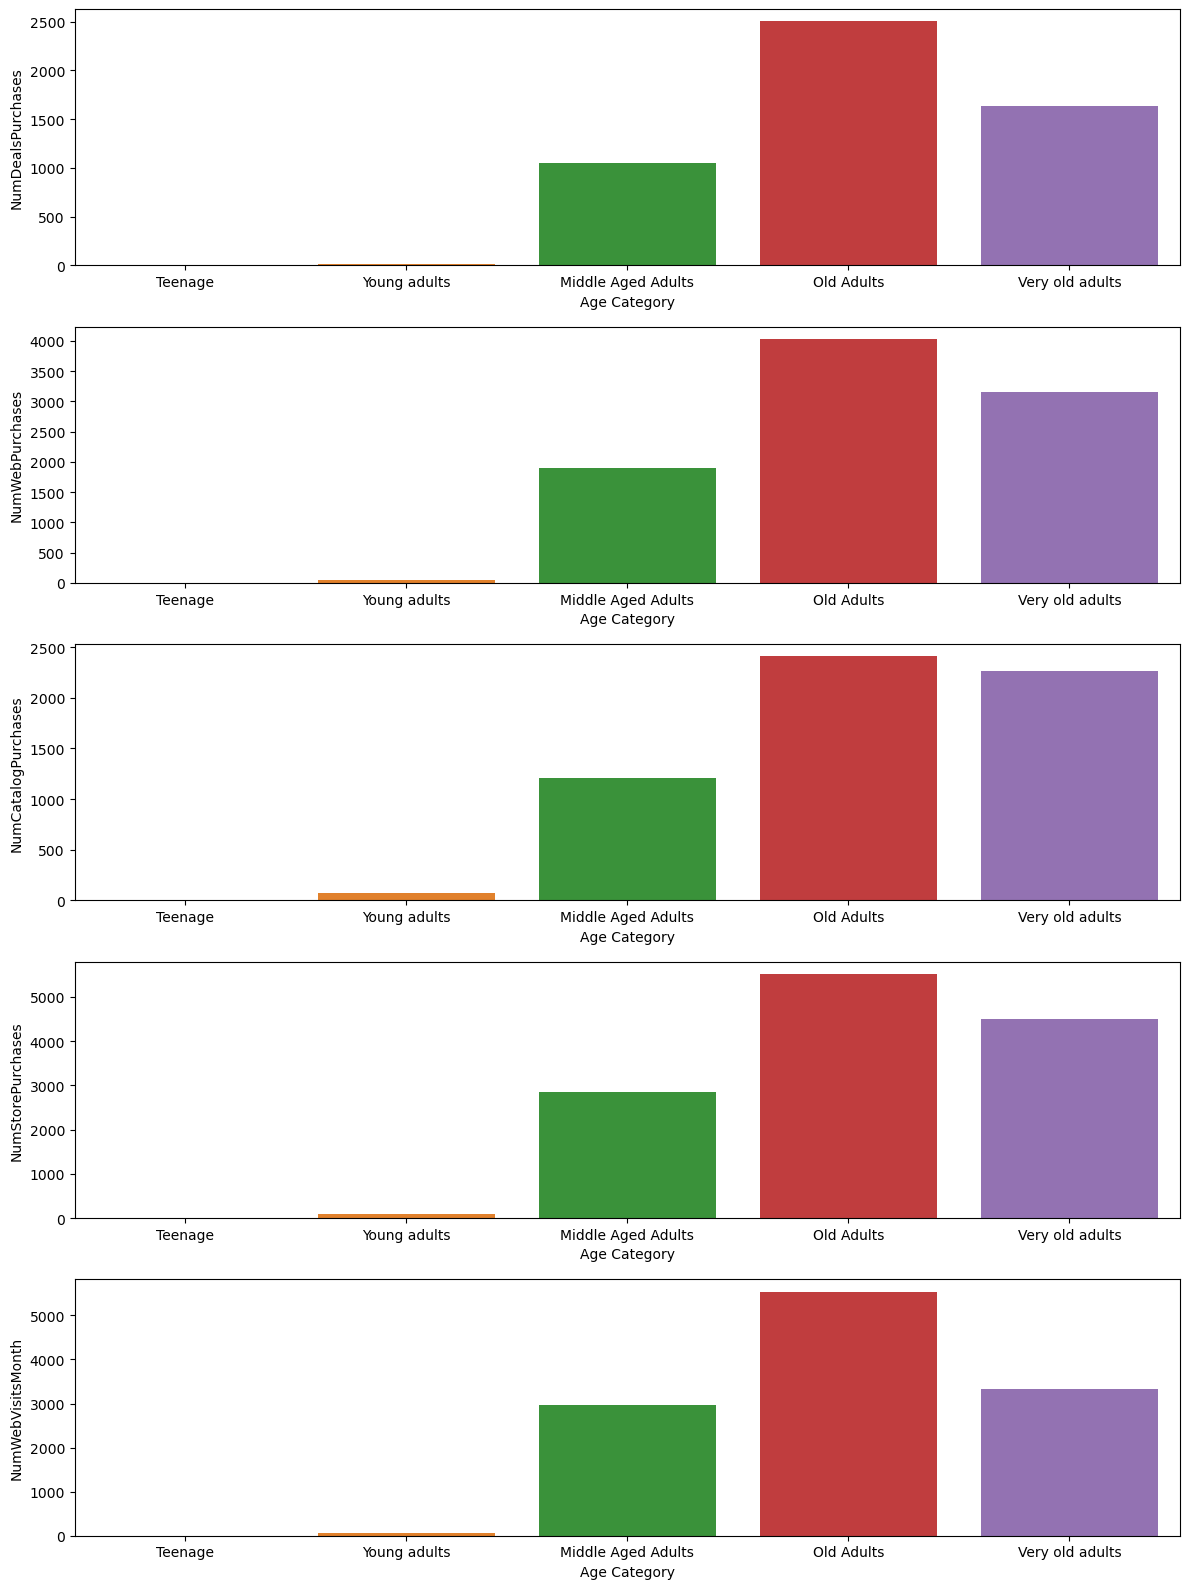

In [19]:
type_purc=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=len(type_purc), ncols=1, figsize=(12,16))
for i, col in enumerate(type_purc):
    age_type_count = df.groupby(['Age Category'])[col].sum()
    age_type_count_series = pd.Series(age_type_count)
    sns.barplot(x=age_type_count_series.index, y=age_type_count_series, ax=axs[i])
    axs[i].set_xlabel('Age Category')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

- Seems middle aged adults tends to purchase more via NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,secondly old adults do more purchases via different windows 

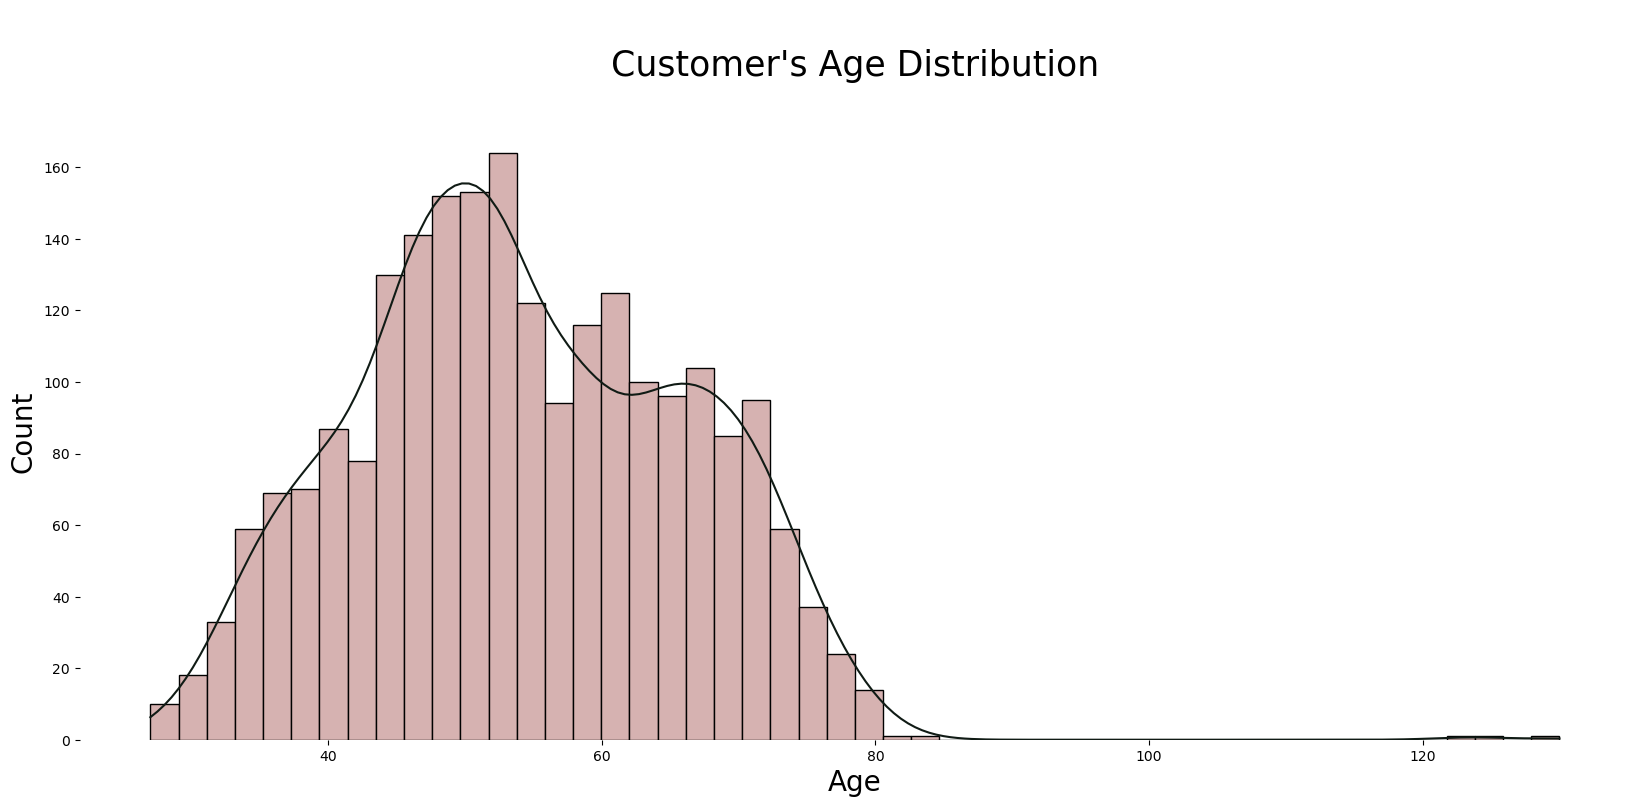

In [20]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(df["Age"],color="#D6B2B1",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Age",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

In [21]:
df['Education'].value_counts()[1]

486

In [22]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

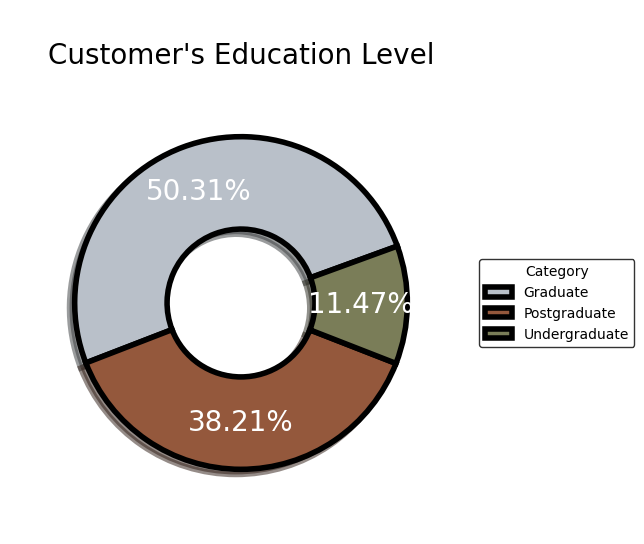

In [23]:
plt.subplots(figsize=(8, 6))

labels = "Graduate","Postgraduate","Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([df["Education"].value_counts()[0],
                                    df["Education"].value_counts()[1],
                                    df["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#B9C0C9","#94583C","#7A7D58"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20);
plt.show()

In [24]:
df['No_of_fmembers']=df['Kidhome']+df['Teenhome']
df

ID  Year_Birth     Education Marital_Status   Income  Kidhome  \
0      5524        1957      Graduate         Single  58138.0        0   
1      2174        1954      Graduate         Single  46344.0        1   
2      4141        1965      Graduate       Together  71613.0        0   
3      6182        1984      Graduate       Together  26646.0        1   
4      5324        1981  Postgraduate        Married  58293.0        1   
...     ...         ...           ...            ...      ...      ...   
2235  10870        1967      Graduate        Married  61223.0        0   
2236   4001        1946  Postgraduate       Together  64014.0        2   
2237   7270        1981      Graduate       Divorced  56981.0        0   
2238   8235        1956  Postgraduate       Together  69245.0        0   
2239   9405        1954  Postgraduate        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235              

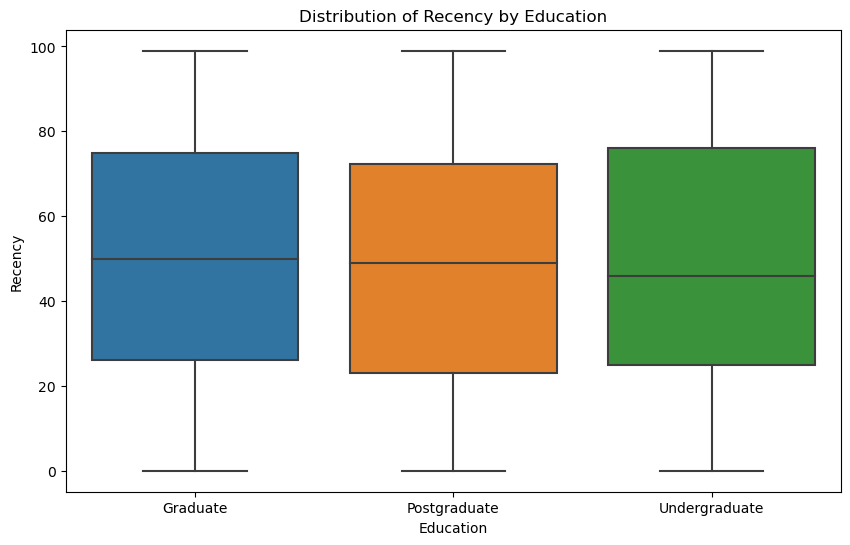

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Recency', data=df)
plt.xlabel('Education')
plt.ylabel('Recency')
plt.title('Distribution of Recency by Education')
plt.show()


In [26]:
# Customer's total spent on products
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

#Narrowing down to these columns to 1 total category
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

- RFM analysis is a marketing technique used to segment customers based on their behavior.

- Recency: How recently a customer has made a purchase

- Frequency: How frequently a customer makes purchases

- Monetary Value: How much a customer spends on purchases

In [27]:
rfc=df.loc[:,['ID','Recency','Total_Spent','Num_Total_Purchases']]
rfc

ID  Recency  Total_Spent  Num_Total_Purchases
0      5524       58         1617                   25
1      2174       38           27                    6
2      4141       26          776                   21
3      6182       26           53                    8
4      5324       94          422                   19
...     ...      ...          ...                  ...
2235  10870       46         1341                   18
2236   4001       56          444                   22
2237   7270       91         1241                   19
2238   8235        8          843                   23
2239   9405       40          172                   11

[2240 rows x 4 columns]

In [28]:
rfc.rename(columns={"Num_Total_Purchases":'Frequency',
                   "Total_Spent":'Monetary'},inplace=True)

In [29]:
def rfm_scores(dataframe):
    dataframe["recency_score"] = pd.qcut(dataframe["Recency"], 5, labels=[5, 4, 3, 2, 1])
    dataframe["frequency_score"] = pd.qcut(dataframe["Frequency"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["monetary_score"] = pd.qcut(dataframe["Monetary"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["rfm_score"] = dataframe["recency_score"].astype(str) + dataframe["frequency_score"].astype(str)
    return dataframe

rfm_scores(rfc)
rfc.head()

ID  Recency  Monetary  Frequency recency_score frequency_score  \
0  5524       58      1617         25             3               5   
1  2174       38        27          6             4               1   
2  4141       26       776         21             4               4   
3  6182       26        53          8             4               2   
4  5324       94       422         19             1               4   

  monetary_score rfm_score  
0              5        35  
1              1        41  
2              4        44  
3              1        42  
4              3        14

In [30]:
df1=df.copy()

# correlation analysis

In [31]:
df1.drop(columns=['ID','Dt_Customer','Age Category','No_of_fmembers','Total_Spent','Num_Total_Purchases'],inplace=True)
df1

Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957      Graduate         Single  58138.0        0         0   
1           1954      Graduate         Single  46344.0        1         1   
2           1965      Graduate       Together  71613.0        0         0   
3           1984      Graduate       Together  26646.0        1         0   
4           1981  Postgraduate        Married  58293.0        1         0   
...          ...           ...            ...      ...      ...       ...   
2235        1967      Graduate        Married  61223.0        0         1   
2236        1946  Postgraduate       Together  64014.0        2         1   
2237        1981      Graduate       Divorced  56981.0        0         0   
2238        1956  Postgraduate       Together  69245.0        0         1   
2239        1954  Postgraduate        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0          58       635         88              546              172   
1          38        11          1                6                2   
2          26       426         49              127              111   
3          26        11          4               20               10   
4          94       173         43              118               46   
...       ...       ...        ...              ...              ...   
2235       46       709         43              182               42   
2236       56       406          0               30                0   
2237       91       908         48              217               32   
2238        8       428         30              214               80   
2239       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                   88            88                  3                8   
1                    1             6                  2                1   
2                   21            42                  1                8   
3                    3             5                  2                2   
4                   27            15                  5                5   
...                ...           ...                ...              ...   
2235               118           247                  2                9   
2236                 0             8                  7                8   
2237                12            24                  1                2   
2238                30            61                  2                6   
2239                 1            21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                      10                  4                  7             0   
1                       1                  2                  5             0   
2                       2                 10                  4             0   
3                       0                  4                  6             0   
4                       3                  6                  5             0   
...                   ...                ...                ...           ...   
2235                    3                  4                  5             0   
2236                    2                  5                  7             0   
2237                    3                 13                  6             0   
2238                    5                 10                  3             0   
2239                    1                  4                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0  

In [32]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in df1.select_dtypes('object').columns:
    df1[i]=lb.fit_transform(df1[i])

<Axes: >

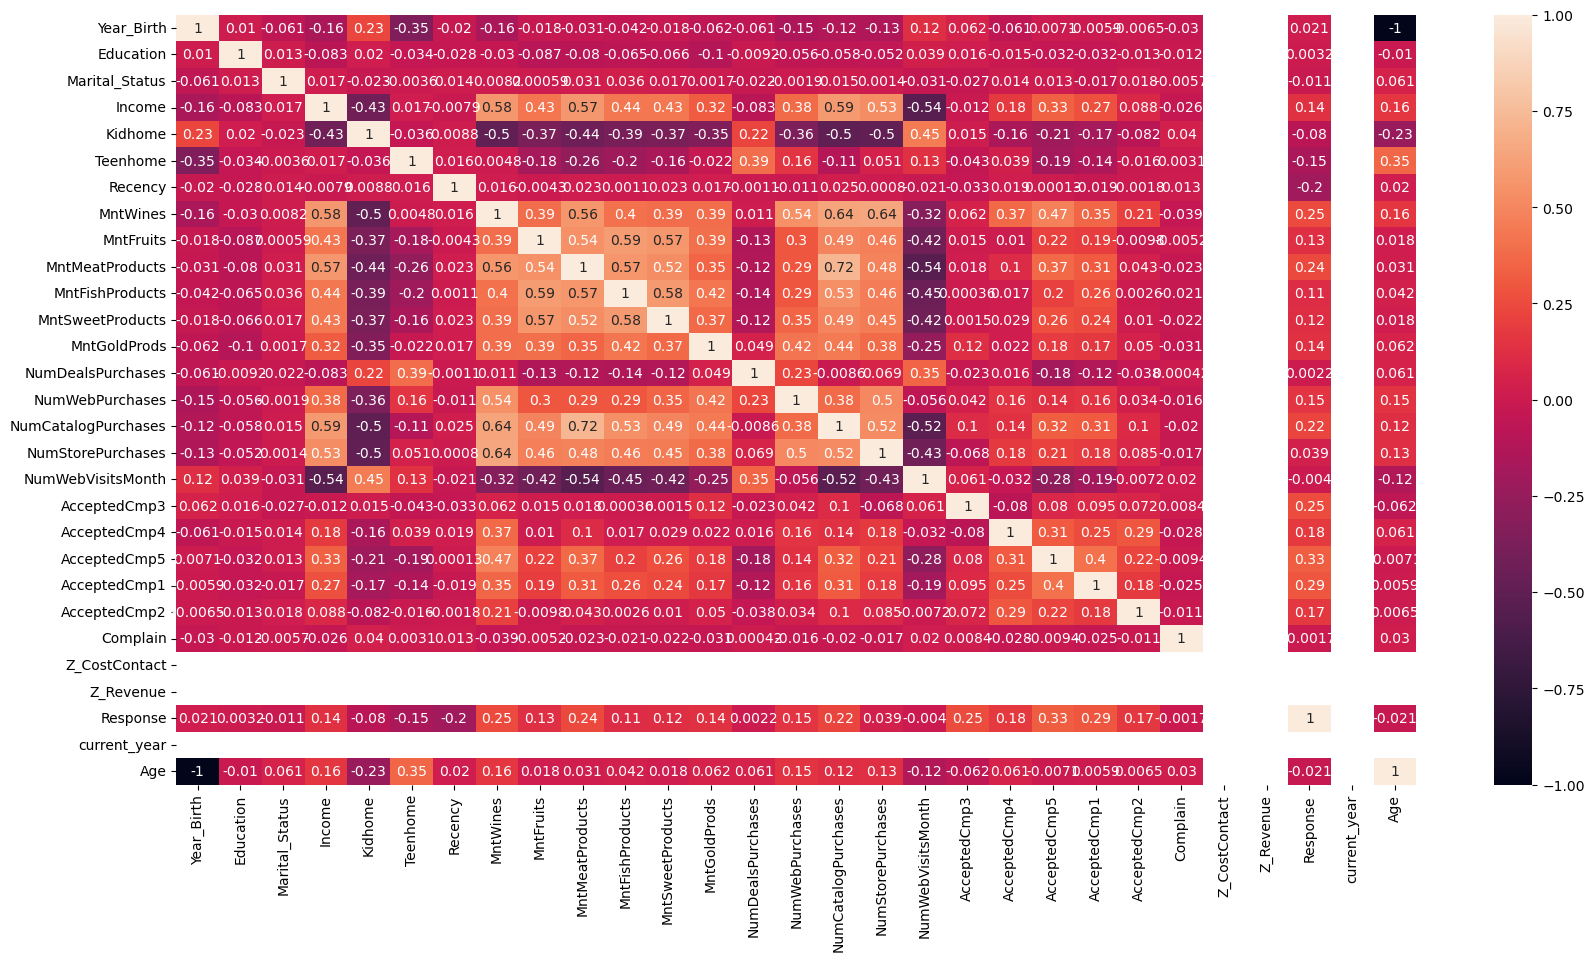

In [33]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)

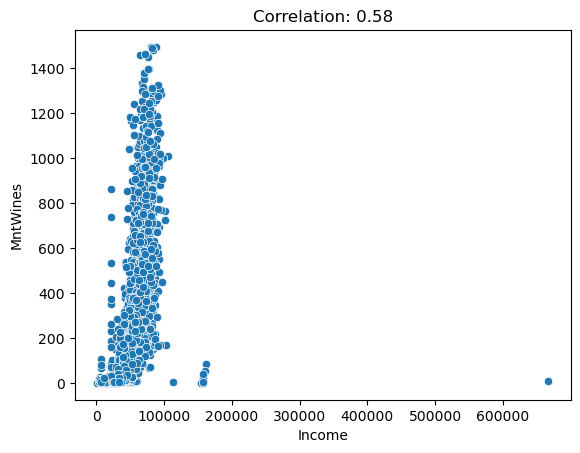

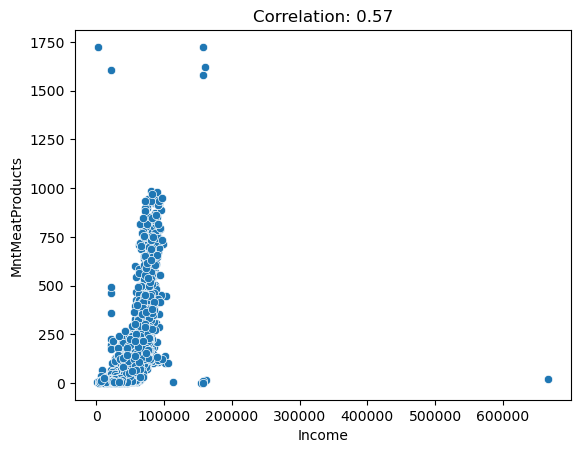

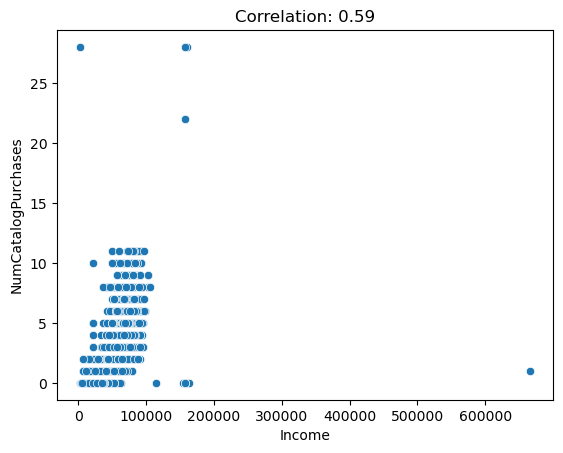

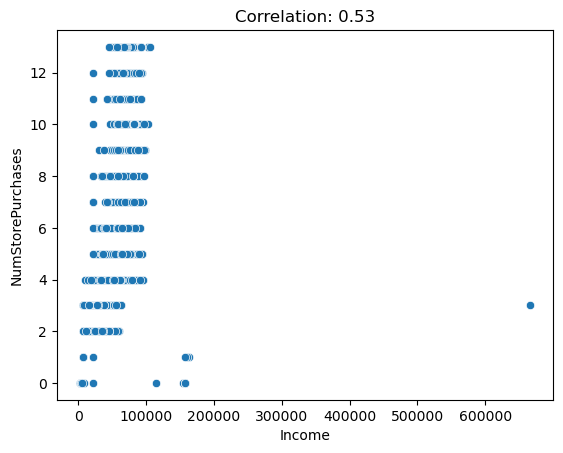

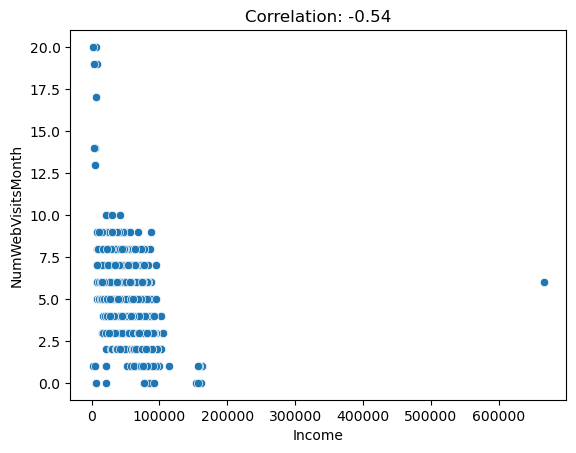

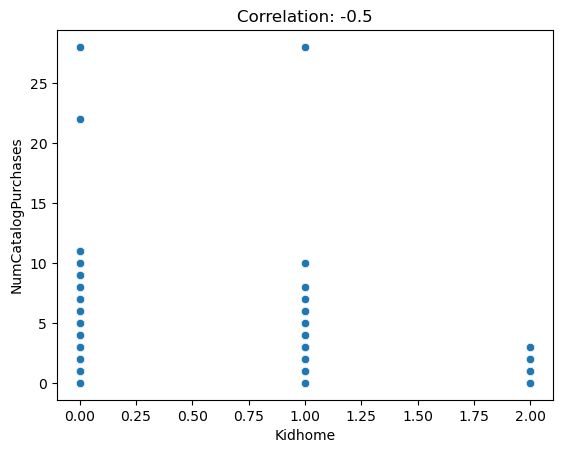

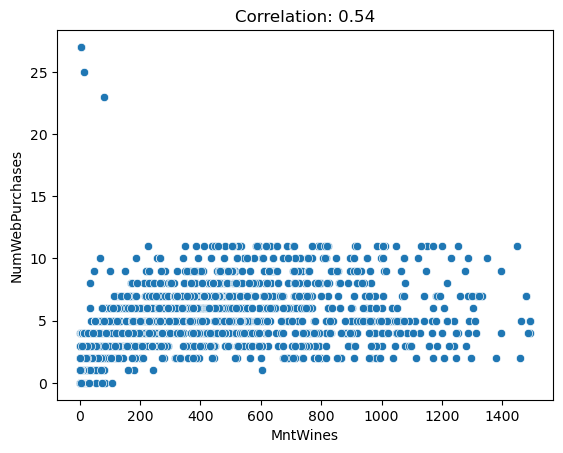

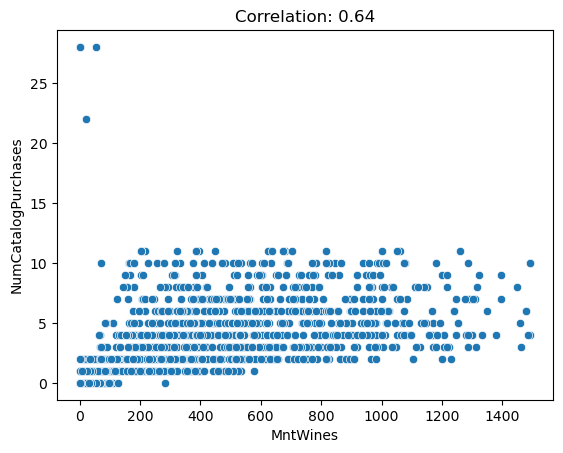

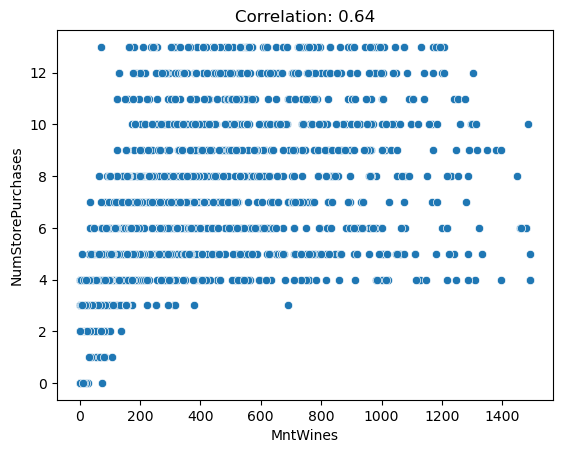

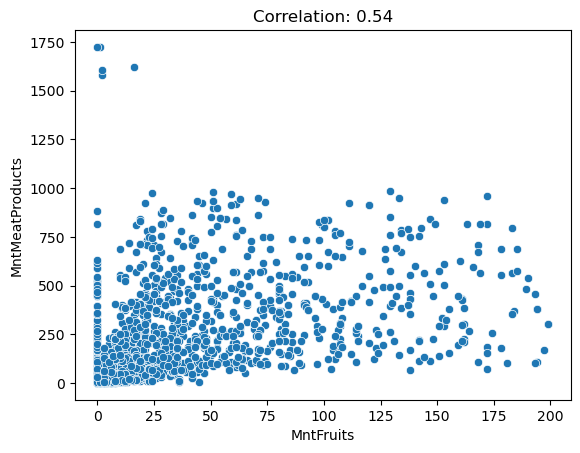

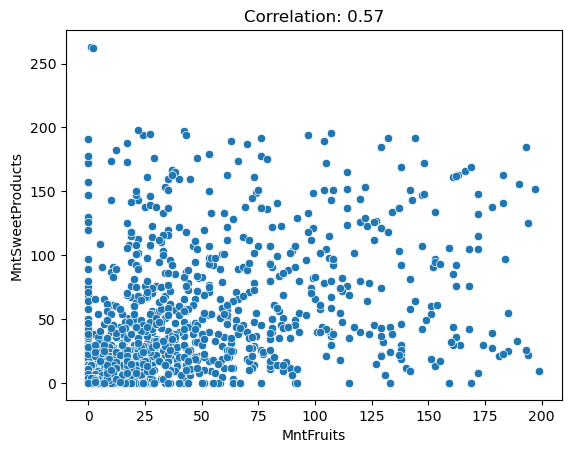

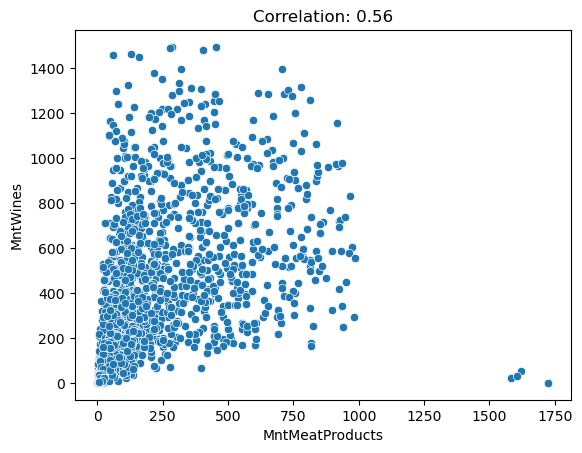

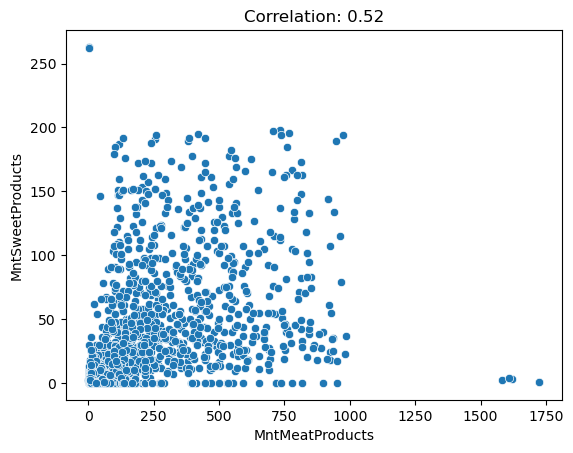

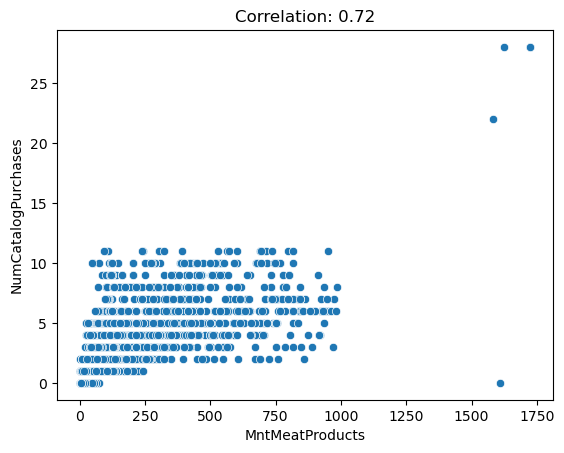

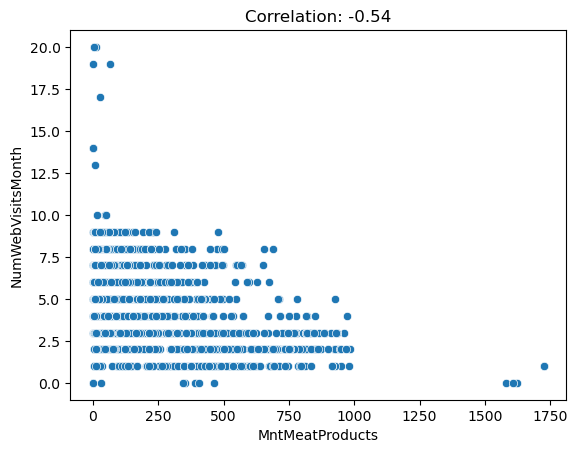

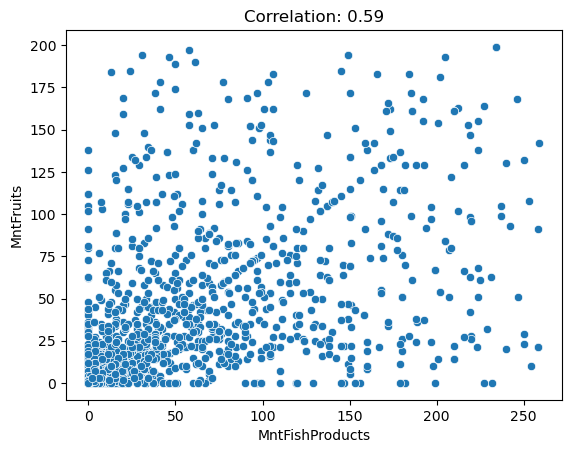

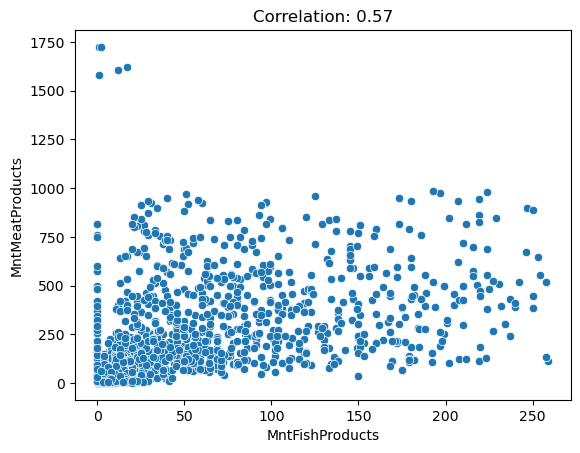

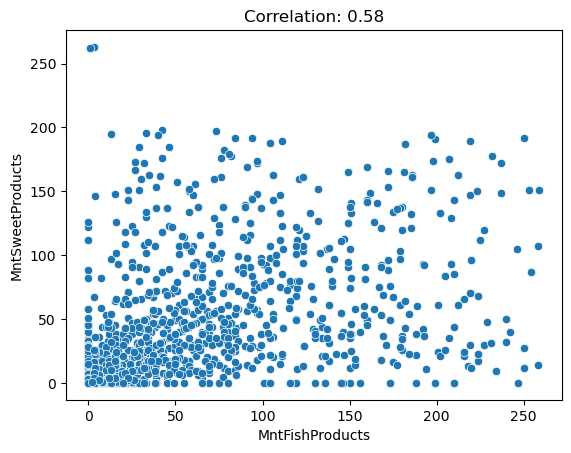

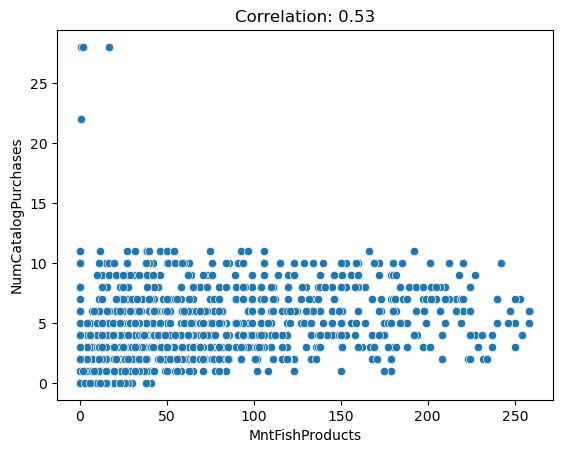

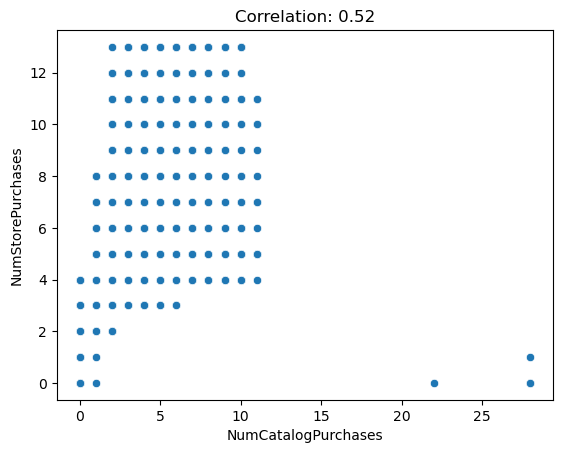

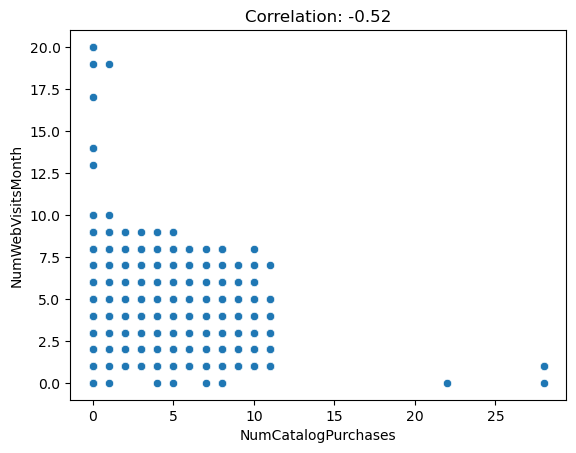

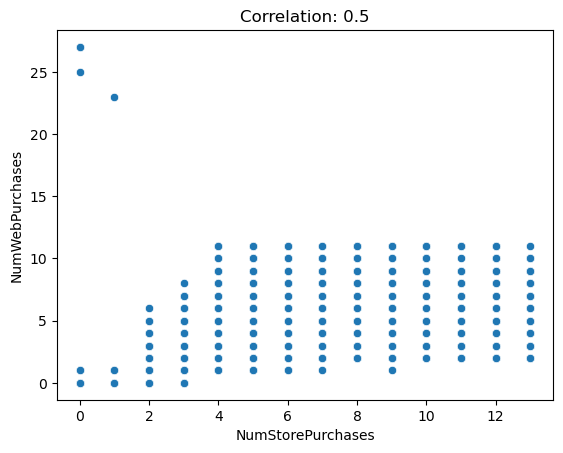

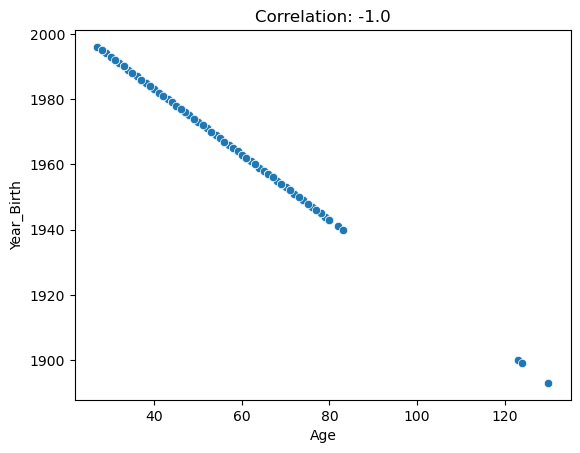

In [34]:
corr_matrix=df1.corr()
corr_pairs=corr_matrix[(corr_matrix>0.5) | (corr_matrix< -0.5)]
corr_pairs=corr_pairs.unstack().reset_index()
corr_pairs=corr_pairs[corr_pairs['level_0']<corr_pairs['level_1']]
corr_pairs=corr_pairs.dropna()

for i, row in corr_pairs.iterrows():
    fig, ax = plt.subplots()
    sns.scatterplot(data=df1, x=row['level_0'], y=row['level_1'], ax=ax)
    ax.set_title(f"Correlation: {round(corr_matrix.loc[row['level_0'], row['level_1']], 2)}")

In [35]:
corr_pairs

level_0              level_1         0
94                Income             MntWines  0.576431
96                Income      MntMeatProducts  0.573586
102               Income  NumCatalogPurchases  0.585856
103               Income    NumStorePurchases  0.526391
104               Income    NumWebVisitsMonth -0.544341
131              Kidhome  NumCatalogPurchases -0.502237
217             MntWines      NumWebPurchases  0.542265
218             MntWines  NumCatalogPurchases  0.635226
219             MntWines    NumStorePurchases  0.642100
241            MntFruits      MntMeatProducts  0.543105
243            MntFruits     MntSweetProducts  0.567164
268      MntMeatProducts             MntWines  0.562667
272      MntMeatProducts     MntSweetProducts  0.523846
276      MntMeatProducts  NumCatalogPurchases  0.723827
278      MntMeatProducts    NumWebVisitsMonth -0.539470
298      MntFishProducts            MntFruits  0.594804
299      MntFishProducts      MntMeatProducts  0.568402
301      MntFishProducts     MntSweetProducts  0.579870
305      MntFishProducts  NumCatalogPurchases  0.534478
451  NumCatalogPurchases    NumStorePurchases  0.518738
452  NumCatalogPurchases    NumWebVisitsMonth -0.520364
478    NumStorePurchases      NumWebPurchases  0.502713
812                  Age           Year_Birth -1.000000

### Correlation analysis summary:

- - Income and MntWineProducts:
- The customers with higher income tend to spend more on wines. This suggests that wine purchases are positively influenced by income levels.

- Income and MntMeatProducts:
- Customers with higher income tend to spend more on meat products. This indicates a positive correlation between income and spending on meat products.

- Income and NumCatalogPurchases:
- Customers with higher income are more likely to make catalog purchases. This suggests that higher income individuals have a greater affinity for purchasing products through catalogs.

- Income and NumStorePurchases:
- Customers with higher income tend to make more purchases from physical stores. This indicates a positive relationship between income and in-store purchases.

- Income and NumWebVisitsMonth:
- There is a negative correlation between income and the number of web visits per month. Customers with higher income tend to visit the website less frequently, possibly indicating that they prefer in-store shopping or have other channels for making purchases.

- Kidhome and NumCatalogPurchases:
- Customers with fewer children at home tend to make more catalog purchases. This suggests that households with fewer children may have more time or inclination to shop through catalogs.

- MntWines and NumWebPurchases:
- Customers who spend more on wines also tend to make more web purchases. This implies a positive relationship between wine spending and online purchasing behavior.

- MntWines and NumCatalogPurchases:
- Customers who spend more on wines also tend to make more catalog purchases. This indicates a connection between wine spending and preference for shopping through catalogs.

- MntWines and NumStorePurchases:
- Customers who spend more on wines also tend to make more purchases from physical stores. This suggests that wine enthusiasts prefer buying wines from brick-and-mortar stores.

- MntFruits and MntMeatProducts:
- There is a positive correlation between spending on fruits and spending on meat products. Customers who purchase more fruits also tend to spend more on meat products, indicating a preference for healthy and balanced food choices.
- These interpretations provide insights into the relationships between different variables in your customer analysis, helping you understand the purchasing behavior and preferences of your customers more comprehensively.

# Descriptive analysis

In [36]:
df1.describe().T

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Education            2240.0      0.611607      0.683533     0.0      0.00   
Marital_Status       2240.0      3.729911      1.076277     0.0      3.00   
Income               2240.0  51921.748661  25232.490127  1730.0  34722.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
current_year         2240.0   2023.000000      0.000000  2023.0   2023.00   
Age                  2240.0     54.194196     11.984069    27.0     46.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Education                0.0      1.00       2.0  
Marital_Status           4.0      5.00       7.0  
Income               51075.0  68289.75  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0  
current_year          2023.0   2023.00    2023.0  
Age                     53.0     64.00     130.0

### Factor analysis

- Factor analysis is a statistical method that can be used to reduce the dimensionality of a dataset with highly correlated independent variables. It involves identifying underlying factors that explain the correlations among the variables and using these factors as new, uncorrelated variables that can be used in further analysis

In [37]:
from factor_analyzer import FactorAnalyzer

fact_df=df1.drop(columns=['Age','current_year'])
fact_df

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0           1957          0               4  58138.0        0         0   
1           1954          0               4  46344.0        1         1   
2           1965          0               5  71613.0        0         0   
3           1984          0               5  26646.0        1         0   
4           1981          1               3  58293.0        1         0   
...          ...        ...             ...      ...      ...       ...   
2235        1967          0               3  61223.0        0         1   
2236        1946          1               5  64014.0        2         1   
2237        1981          0               2  56981.0        0         0   
2238        1956          1               5  69245.0        0         1   
2239        1954          1               3  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0          58       635         88              546              172   
1          38        11          1                6                2   
2          26       426         49              127              111   
3          26        11          4               20               10   
4          94       173         43              118               46   
...       ...       ...        ...              ...              ...   
2235       46       709         43              182               42   
2236       56       406          0               30                0   
2237       91       908         48              217               32   
2238        8       428         30              214               80   
2239       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                   88            88                  3                8   
1                    1             6                  2                1   
2                   21            42                  1                8   
3                    3             5                  2                2   
4                   27            15                  5                5   
...                ...           ...                ...              ...   
2235               118           247                  2                9   
2236                 0             8                  7                8   
2237                12            24                  1                2   
2238                30            61                  2                6   
2239                 1            21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                      10                  4                  7             0   
1                       1                  2                  5             0   
2                       2                 10                  4             0   
3                       0                  4                  6             0   
4                       3                  6                  5             0   
...                   ...                ...                ...           ...   
2235                    3                  4                  5             0   
2236                    2                  5                  7             0   
2237                    3                 13                  6             0   
2238                    5                 10                  3             0   
2239                    1                  4                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0            

In [38]:
from sklearn.preprocessing import StandardScaler
X_Factor = StandardScaler().fit_transform(fact_df)
X_Factor

array([[-0.98534473, -0.89497381,  0.25100375, ...,  0.        ,
         0.        ,  2.38884634],
       [-1.23573295, -0.89497381,  0.25100375, ...,  0.        ,
         0.        , -0.41861211],
       [-0.3176428 , -0.89497381,  1.18033993, ...,  0.        ,
         0.        , -0.41861211],
       ...,
       [ 1.01776106, -0.89497381, -1.60766862, ...,  0.        ,
         0.        , -0.41861211],
       [-1.06880747,  0.56834103,  1.18033993, ...,  0.        ,
         0.        , -0.41861211],
       [-1.23573295,  0.56834103, -0.67833244, ...,  0.        ,
         0.        ,  2.38884634]])

In [39]:
fact_df=fact_df.drop(columns=['Z_CostContact'])

In [40]:
fact_df=fact_df.drop(columns=['Z_Revenue'])

(<Figure size 1200x1000 with 2 Axes>, <Axes: >)

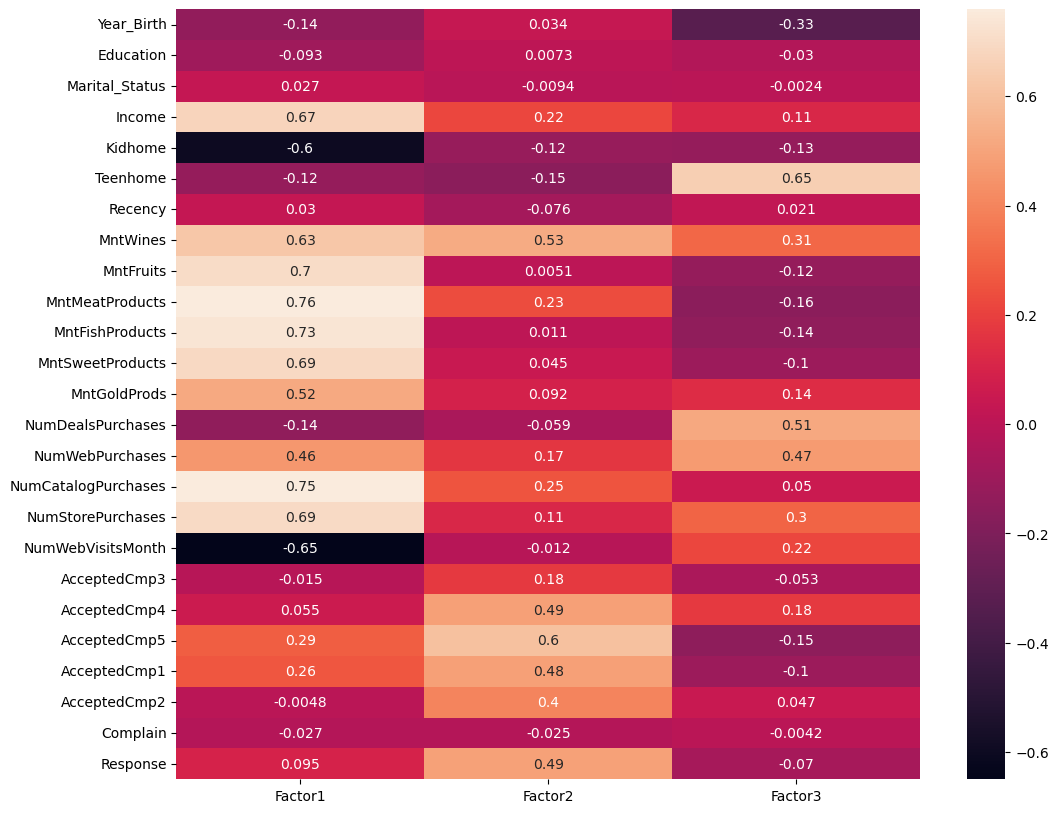

In [41]:
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(fact_df)
loads=pd.DataFrame(fa.loadings_,columns=['Factor1','Factor2','Factor3'],index=fact_df.columns)
fig=plt.figure(figsize=(12,10))
fig,sns.heatmap(loads,annot=True)

In [42]:
var_expld=pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
var_expld

0         1         2
Variance          5.472700  1.811417  1.441356
Proportional Var  0.218908  0.072457  0.057654
Cumulative Var    0.218908  0.291365  0.349019

In [43]:
loads

Factor1   Factor2   Factor3
Year_Birth          -0.135163  0.033988 -0.326363
Education           -0.092855  0.007284 -0.029658
Marital_Status       0.027439 -0.009408 -0.002419
Income               0.673959  0.216326  0.112266
Kidhome             -0.604696 -0.117423 -0.126693
Teenhome            -0.123073 -0.154682  0.649168
Recency              0.029773 -0.076138  0.020605
MntWines             0.626283  0.525941  0.312370
MntFruits            0.702677  0.005143 -0.122326
MntMeatProducts      0.758954  0.232009 -0.155683
MntFishProducts      0.732250  0.010623 -0.141214
MntSweetProducts     0.688680  0.045154 -0.100561
MntGoldProds         0.517855  0.091735  0.136138
NumDealsPurchases   -0.141695 -0.059182  0.511661
NumWebPurchases      0.461607  0.166230  0.472337
NumCatalogPurchases  0.754570  0.254797  0.050204
NumStorePurchases    0.694028  0.110178  0.301159
NumWebVisitsMonth   -0.649604 -0.011791  0.216843
AcceptedCmp3        -0.015054  0.179638 -0.053454
AcceptedCmp4         0.054838  0.487620  0.177048
AcceptedCmp5         0.285757  0.603221 -0.145222
AcceptedCmp1         0.260064  0.484290 -0.102561
AcceptedCmp2        -0.004785  0.399011  0.046617
Complain            -0.026917 -0.025488 -0.004244
Response             0.095058  0.492064 -0.070398

- Factor1:

- This factor is strongly influenced by variables such as Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumCatalogPurchases, NumStorePurchases, and NumWebVisitsMonth.
- Higher values of Factor1 are associated with higher levels of income and higher spending on various products.
- This factor may indicate the customer's purchasing power and overall spending behavior.

- Factor2:

- This factor is influenced by variables such as Teenhome, NumDealsPurchases, NumWebPurchases, NumStorePurchases, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, and Response.
- Higher values of Factor2 are associated with higher levels of teenage and household involvement in purchasing, as well as higher responsiveness to marketing campaigns.
- This factor may represent the customer's engagement and responsiveness to marketing efforts.

- Factor3:

- This factor is influenced by variables such as Teenhome, NumWebVisitsMonth, MntMeatProducts, MntFishProducts, MntSweetProducts, NumCatalogPurchases, and MntGoldProds.
- Higher values of Factor3 are associated with lower teenage involvement, higher online visits, and higher spending on meat, fish, sweet products, and catalog purchases.
- This factor may represent the customer's preference for online shopping and specific product categories.

In [44]:
df1=df1.drop(columns=['Z_CostContact','Z_Revenue','current_year','Age'])
df1

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0           1957          0               4  58138.0        0         0   
1           1954          0               4  46344.0        1         1   
2           1965          0               5  71613.0        0         0   
3           1984          0               5  26646.0        1         0   
4           1981          1               3  58293.0        1         0   
...          ...        ...             ...      ...      ...       ...   
2235        1967          0               3  61223.0        0         1   
2236        1946          1               5  64014.0        2         1   
2237        1981          0               2  56981.0        0         0   
2238        1956          1               5  69245.0        0         1   
2239        1954          1               3  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0          58       635         88              546              172   
1          38        11          1                6                2   
2          26       426         49              127              111   
3          26        11          4               20               10   
4          94       173         43              118               46   
...       ...       ...        ...              ...              ...   
2235       46       709         43              182               42   
2236       56       406          0               30                0   
2237       91       908         48              217               32   
2238        8       428         30              214               80   
2239       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                   88            88                  3                8   
1                    1             6                  2                1   
2                   21            42                  1                8   
3                    3             5                  2                2   
4                   27            15                  5                5   
...                ...           ...                ...              ...   
2235               118           247                  2                9   
2236                 0             8                  7                8   
2237                12            24                  1                2   
2238                30            61                  2                6   
2239                 1            21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                      10                  4                  7             0   
1                       1                  2                  5             0   
2                       2                 10                  4             0   
3                       0                  4                  6             0   
4                       3                  6                  5             0   
...                   ...                ...                ...           ...   
2235                    3                  4                  5             0   
2236                    2                  5                  7             0   
2237                    3                 13                  6             0   
2238                    5                 10                  3             0   
2239                    1                  4                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0            

# PCA

In [45]:
from sklearn.decomposition import PCA

In [46]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df1)
scaled_df=pd.DataFrame(scaled_df,columns=df1.columns)
scaled_df.head()

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0   -0.985345  -0.894974        0.251004  0.246414 -0.825218 -0.929894   
1   -1.235733  -0.894974        0.251004 -0.221104  1.032559  0.906934   
2   -0.317643  -0.894974        1.180340  0.780567 -0.825218 -0.929894   
3    1.268149  -0.894974        1.180340 -1.001938  1.032559 -0.929894   
4    1.017761   0.568341       -0.678332  0.252558  1.032559 -0.929894   

    Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.307039  0.983781   1.551577         1.679702         2.462147   
1 -0.383664 -0.870479  -0.636301        -0.713225        -0.650449   
2 -0.798086  0.362723   0.570804        -0.177032         1.345274   
3 -0.798086 -0.870479  -0.560857        -0.651187        -0.503974   
4  1.550305 -0.389085   0.419916        -0.216914         0.155164   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.476500      0.843207           0.349414         1.409304   
1         -0.631503     -0.729006          -0.168236        -1.110409   
2         -0.146905     -0.038766          -0.685887         1.409304   
3         -0.583043     -0.748179          -0.168236        -0.750450   
4         -0.001525     -0.556446           1.384715         0.329427   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0             2.510890          -0.550785           0.693904      -0.28014   
1            -0.568720          -1.166125          -0.130463      -0.28014   
2            -0.226541           1.295237          -0.542647      -0.28014   
3            -0.910898          -0.550785           0.281720      -0.28014   
4             0.115638           0.064556          -0.130463      -0.28014   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0      -0.28383      -0.28014     -0.262111      -0.11651 -0.097282  2.388846  
1      -0.28383      -0.28014     -0.262111      -0.11651 -0.097282 -0.418612  
2      -0.28383      -0.28014     -0.262111      -0.11651 -0.097282 -0.418612  
3      -0.28383      -0.28014     -0.262111      -0.11651 -0.097282 -0.418612  
4      -0.28383      -0.28014     -0.262111      -0.11651 -0.097282 -0.418612

[6.52280243 2.02563803 1.89690391 1.41475061 1.11041739 1.0380407
 1.00373893 0.9812106  0.97959382 0.85758309 0.76108095 0.73727784
 0.65743308 0.60787256 0.58492121 0.56055716 0.5174865  0.46593228
 0.44084705 0.40642613 0.37704323 0.31554555 0.30863996 0.2441092
 0.19531349]


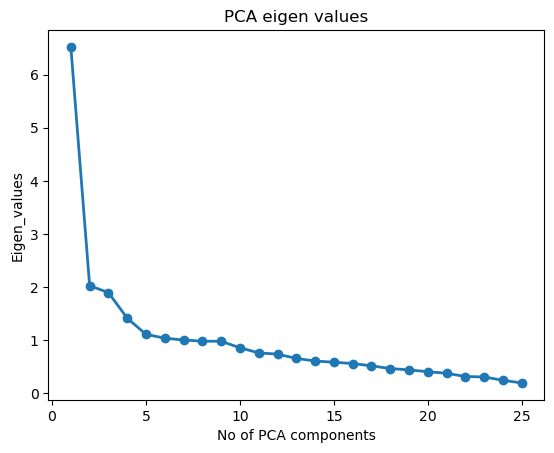

In [47]:
pca=PCA(n_components=len(df1.columns))
pca.fit(scaled_df)

variance_ratio=pca.explained_variance_
plt.plot(np.arange(1,len(variance_ratio)+1),variance_ratio,'o-',linewidth=2)
plt.ylabel('Eigen_values')
plt.xlabel('No of PCA components')
plt.title('PCA eigen values')
print(variance_ratio)

In [48]:
cumu_variance_ratio=np.cumsum(pca.explained_variance_ratio_)
cumu_variance_ratio

array([0.26079562, 0.34178497, 0.41762725, 0.47419201, 0.51858888,
       0.56009197, 0.6002236 , 0.63945451, 0.67862077, 0.71290878,
       0.74333842, 0.77281637, 0.79910195, 0.823406  , 0.84679241,
       0.86920468, 0.8898949 , 0.90852387, 0.92614988, 0.94239967,
       0.95747467, 0.97009085, 0.98243094, 0.99219095, 1.        ])

In [49]:
pca1=PCA(n_components=25)
pca_df=pca1.fit_transform(scaled_df)

In [50]:
eigenvalues = pca.explained_variance_
n_components = np.sum(eigenvalues > 1)
eigenvalues

array([6.52280243, 2.02563803, 1.89690391, 1.41475061, 1.11041739,
       1.0380407 , 1.00373893, 0.9812106 , 0.97959382, 0.85758309,
       0.76108095, 0.73727784, 0.65743308, 0.60787256, 0.58492121,
       0.56055716, 0.5174865 , 0.46593228, 0.44084705, 0.40642613,
       0.37704323, 0.31554555, 0.30863996, 0.2441092 , 0.19531349])

### Here we are choosing the 7 pca components which has eigen values more than 1

In [51]:
pca1=PCA(n_components=7).fit(scaled_df)
pca_df=pca1.transform(scaled_df)

In [52]:
pca_df

array([[ 3.80601158, -0.00987912, -0.3583052 , ...,  0.04142915,
         0.4600741 , -0.54153322],
       [-2.32952269,  0.26635811, -0.24038707, ...,  0.76149204,
         0.7862875 ,  0.39541908],
       [ 1.66537323,  0.1789441 , -1.11290189, ...,  0.3443223 ,
        -0.26348238, -0.30400737],
       ...,
       [ 1.4967871 , -0.03205705,  0.96981636, ..., -2.72924808,
        -0.44220784,  1.20043457],
       [ 1.74441107,  1.34654474, -0.94622132, ...,  1.83699874,
        -0.67042385, -0.35006899],
       [-1.70140604,  0.61317336,  1.20940557, ...,  1.34136215,
        -0.11258118,  0.66316122]])

In [53]:
scaled_df

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0      -0.985345  -0.894974        0.251004  0.246414 -0.825218 -0.929894   
1      -1.235733  -0.894974        0.251004 -0.221104  1.032559  0.906934   
2      -0.317643  -0.894974        1.180340  0.780567 -0.825218 -0.929894   
3       1.268149  -0.894974        1.180340 -1.001938  1.032559 -0.929894   
4       1.017761   0.568341       -0.678332  0.252558  1.032559 -0.929894   
...          ...        ...             ...       ...       ...       ...   
2235   -0.150717  -0.894974       -0.678332  0.368704 -0.825218  0.906934   
2236   -1.903435   0.568341        1.180340  0.479340  2.890335  0.906934   
2237    1.017761  -0.894974       -1.607669  0.200550 -0.825218 -0.929894   
2238   -1.068807   0.568341        1.180340  0.686699 -0.825218  0.906934   
2239   -1.235733   0.568341       -0.678332  0.037549  1.032559  0.906934   

       Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     0.307039  0.983781   1.551577         1.679702         2.462147   
1    -0.383664 -0.870479  -0.636301        -0.713225        -0.650449   
2    -0.798086  0.362723   0.570804        -0.177032         1.345274   
3    -0.798086 -0.870479  -0.560857        -0.651187        -0.503974   
4     1.550305 -0.389085   0.419916        -0.216914         0.155164   
...        ...       ...        ...              ...              ...   
2235 -0.107383  1.203678   0.419916         0.066692         0.081926   
2236  0.237969  0.303291  -0.661449        -0.606873        -0.687068   
2237  1.446700  1.795020   0.545656         0.221789        -0.101168   
2238 -1.419719  0.368666   0.092992         0.208495         0.777683   
2239 -0.314594 -0.653555  -0.586005        -0.469501        -0.650449   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             1.476500      0.843207           0.349414         1.409304   
1            -0.631503     -0.729006          -0.168236        -1.110409   
2            -0.146905     -0.038766          -0.685887         1.409304   
3            -0.583043     -0.748179          -0.168236        -0.750450   
4            -0.001525     -0.556446           1.384715         0.329427   
...                ...           ...                ...              ...   
2235          2.203398      3.891766          -0.168236         1.769263   
2236         -0.655733     -0.690659           2.420015         1.409304   
2237         -0.364974     -0.383886          -0.685887        -0.750450   
2238          0.071165      0.325527          -0.168236         0.689386   
2239         -0.631503     -0.441406           0.349414        -0.390491   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                2.510890          -0.550785           0.693904      -0.28014   
1               -0.568720          -1.166125          -0.130463      -0.28014   
2               -0.226541           1.295237          -0.542647      -0.28014   
3               -0.910898          -0.550785           0.281720      -0.28014   
4                0.115638           0.064556          -0.130463      -0.28014   
...                   ...                ...                ...           ...   
2235             0.115638          -0.550785          -0.130463      -0.28014   
2236            -0.226541          -0.243114           0.693904      -0.28014   
2237             0.115638           2.218248           0.281720      -0.28014   
2238             0.799996           1.295237          -0.954831      -0.28014   
2239            -0.568720          -0.550785           0.693904      -0.28014   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
1        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
2        -0.283830      -0.28014     -0.262111      -0.11651 -0.097282   
3        -0.283830    

# Kmeans

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

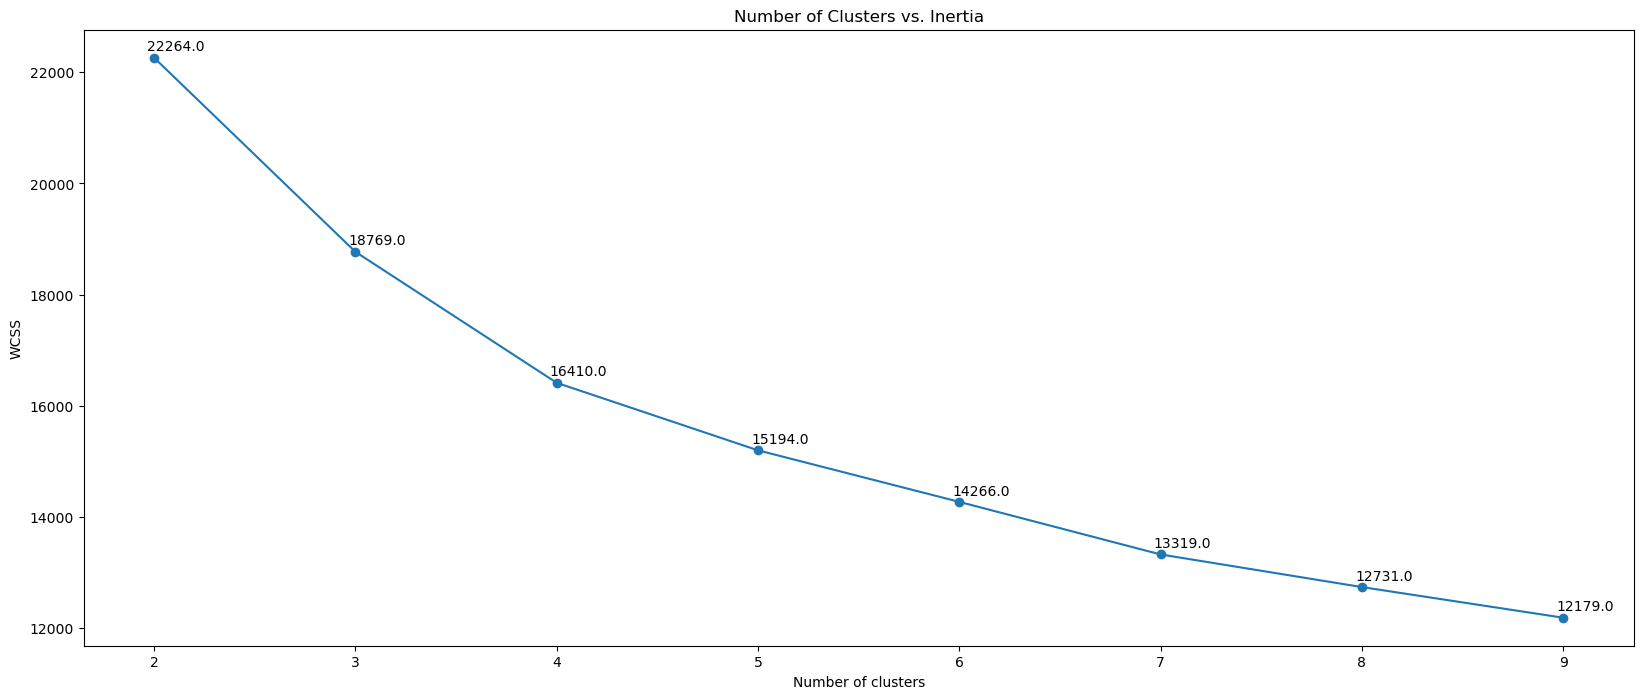

In [55]:
clusters=[]
for i in range(2,10):
    kmean=KMeans(n_clusters=i,max_iter = 50, random_state=101)
    kmean.fit(pca_df)
    clusters.append(kmean.inertia_)
fig=plt.figure(figsize=(20,8))
plt.plot(list(range(2,10)),clusters,marker='o')
for x, y in zip(list(range(2,10)),clusters):
    plt.annotate(f"{round(y,0)}", xy=(x,y), xytext=(-5,5), textcoords='offset points')
    
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Number of Clusters vs. Inertia")
plt.show()

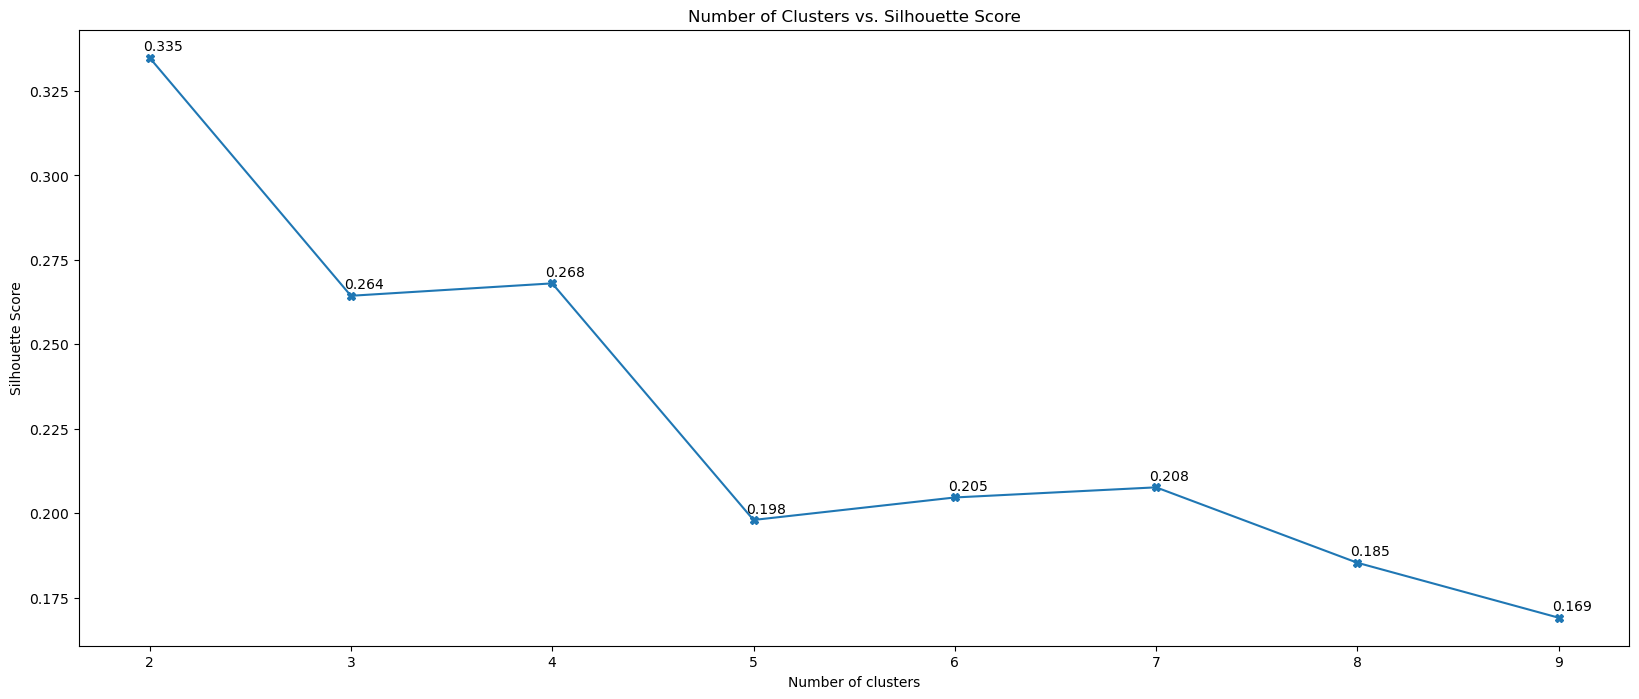

In [56]:
silhouette_value = []
for n in range(2,10):
    km = KMeans(n_clusters = n, random_state=101).fit(pca_df)
    silhouette_value.append(silhouette_score(pca_df, km.labels_))

fig=plt.figure(figsize=(20,8))
plt.plot(list(range(2,10)), silhouette_value, marker='X', label=silhouette_value)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score")

for x, y in zip(list(range(2,10)),silhouette_value):
    plt.annotate(f"{round(y,3)}", xy=(x,y), xytext=(-5,5), textcoords='offset points')
    
plt.show()

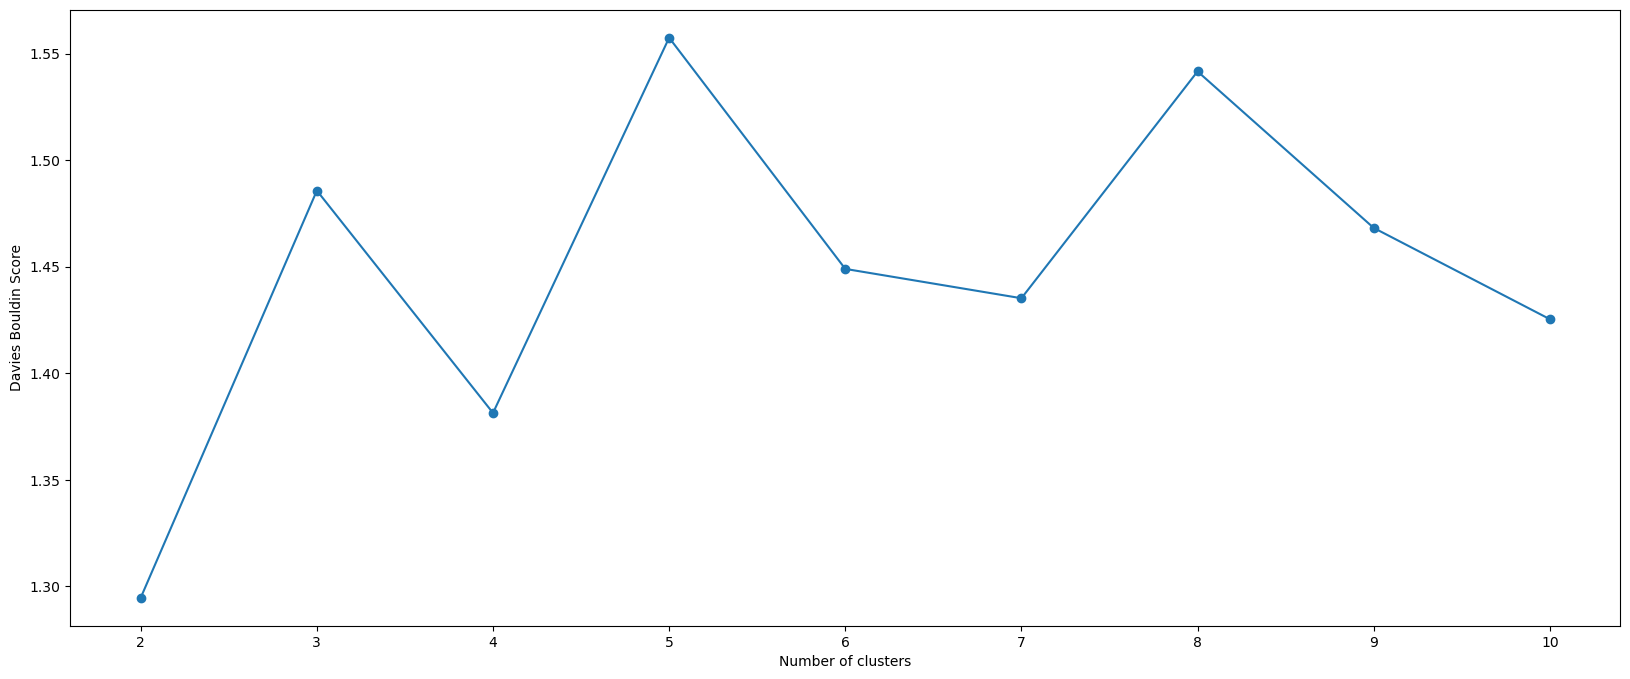

In [57]:
from sklearn.metrics import davies_bouldin_score

scores = []
for k in range(2,11,1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    score = davies_bouldin_score(pca_df, kmeans.labels_)
    scores.append(score)
    
fig=plt.figure(figsize=(20,8))
plt.plot(range(2,11,1), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

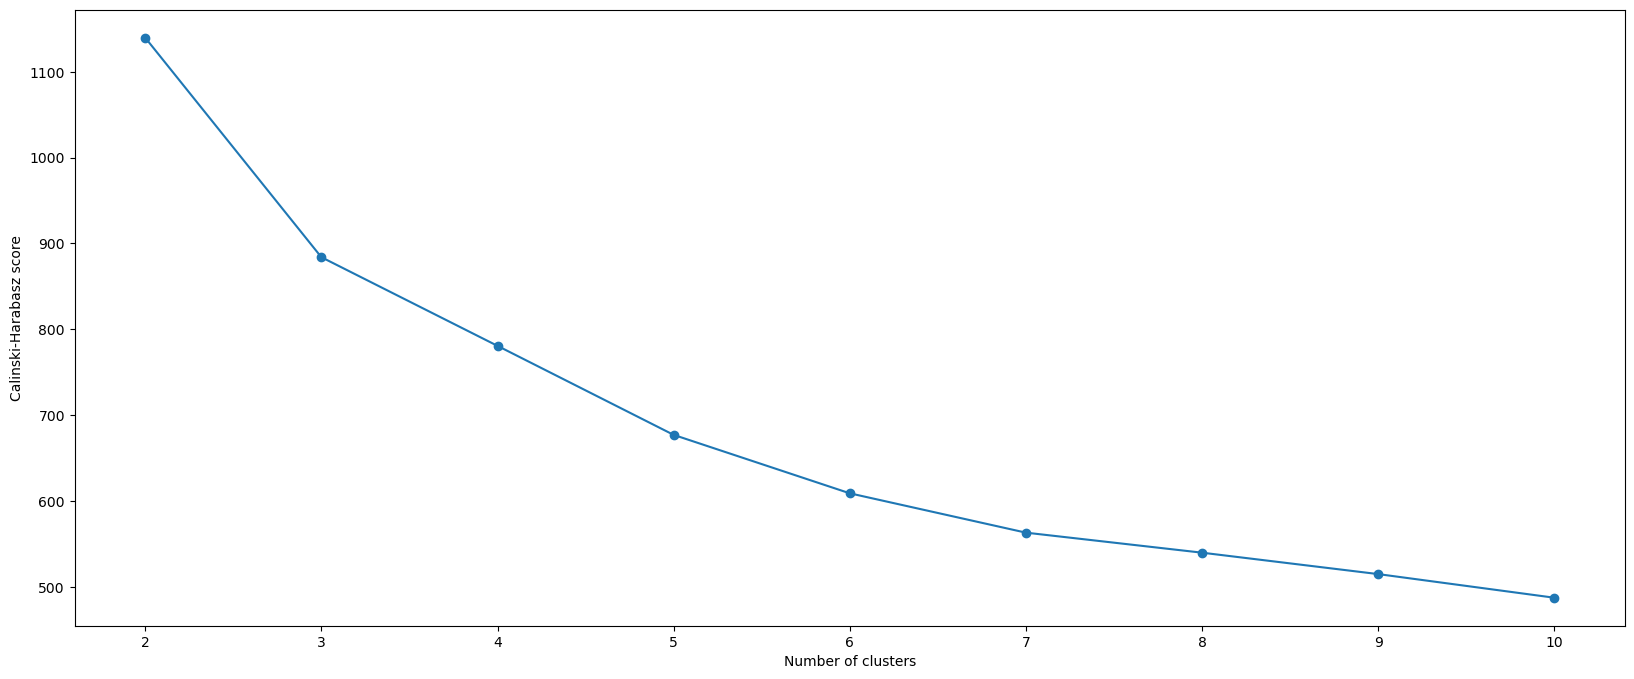

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

scores = []
for k in range(2,11,1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    score = calinski_harabasz_score(pca_df, kmeans.labels_)
    scores.append(score)

fig=plt.figure(figsize=(20,8))
plt.plot(range(2,11,1), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz score')
plt.show()

# By all these metrics we choose 4 no of clusters 

In [59]:
# Building K Means model with 4 clusters
km = KMeans(n_clusters=4, max_iter=100 , random_state = 101)
km.fit(pca_df)

KMeans(max_iter=100, n_clusters=4, random_state=101)

In [60]:
clusters_pca=pd.DataFrame(pca_df,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7'])
clusters_pca['Kmeans_cluster']=km.fit_predict(pca_df)
clusters_pca

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0     3.806012 -0.009879 -0.358305  2.017852  0.041429  0.460074 -0.541533   
1    -2.329523  0.266358 -0.240387 -0.989315  0.761492  0.786288  0.395419   
2     1.665373  0.178944 -1.112902 -0.213198  0.344322 -0.263482 -0.304007   
3    -2.455965 -1.366120 -0.154456  0.150171 -0.492659 -0.251723 -0.417883   
4    -0.480443 -0.135149 -0.639905  0.655855 -1.920982 -0.468218 -0.286506   
...        ...       ...       ...       ...       ...       ...       ...   
2235  2.391149  1.637853 -0.976317  1.495041 -0.505063  0.553053  0.266391   
2236 -0.979973  2.277853  1.871130  0.260825 -0.213668  0.199063 -0.903566   
2237  1.496787 -0.032057  0.969816 -1.654315 -2.729248 -0.442208  1.200435   
2238  1.744411  1.346545 -0.946221 -0.607979  1.836999 -0.670424 -0.350069   
2239 -1.701406  0.613173  1.209406  0.482248  1.341362 -0.112581  0.663161   

      Kmeans_cluster  
0                  2  
1                  1  
2                  2  
3                  1  
4                  1  
...              ...  
2235               2  
2236               0  
2237               0  
2238               0  
2239               1  

[2240 rows x 8 columns]

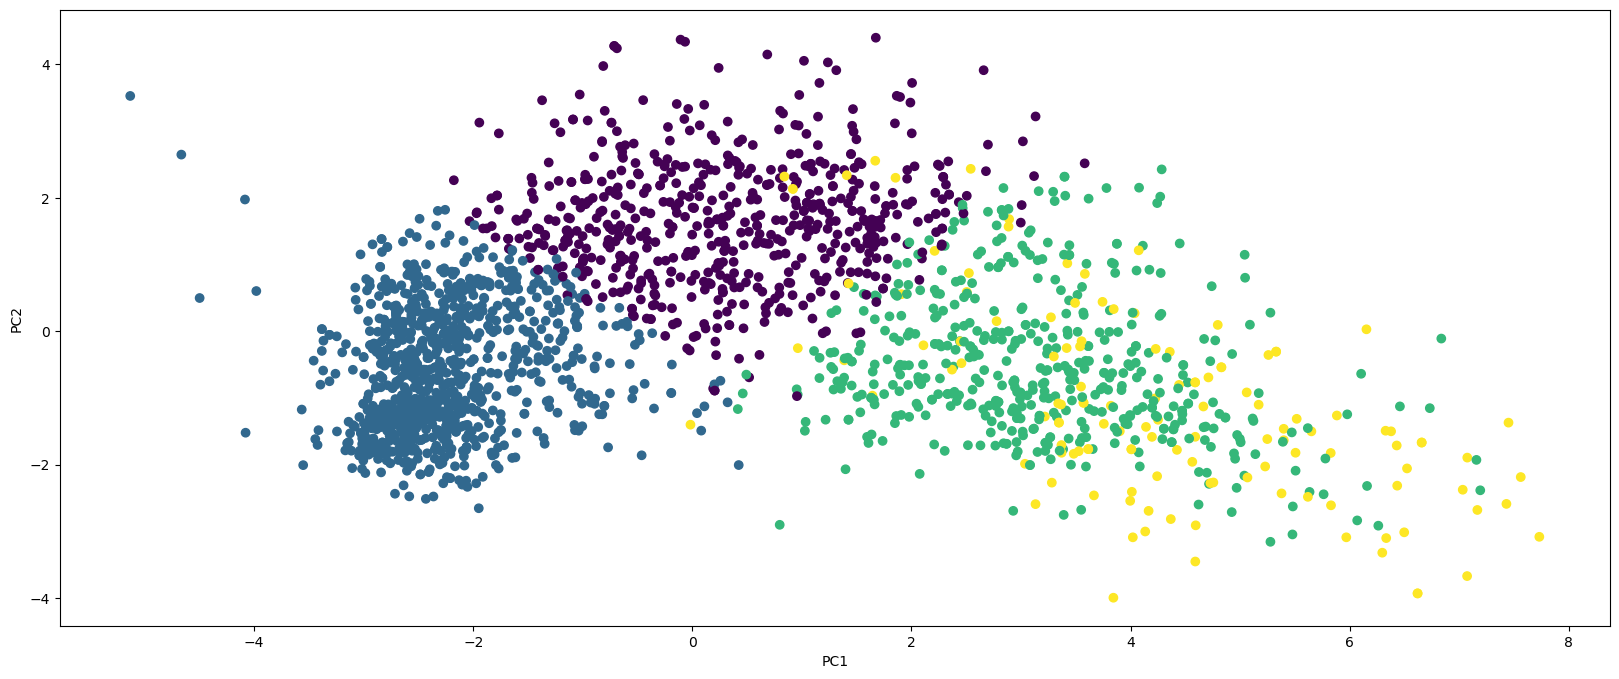

In [61]:
fig=plt.figure(figsize=(20,8))
plt.scatter(clusters_pca['PCA1'], clusters_pca['PCA2'], c=clusters_pca['Kmeans_cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [62]:
clusters_pca['Kmeans_cluster'].value_counts()

1    1010
0     607
2     496
3     127
Name: Kmeans_cluster, dtype: int64